# 1.Introduction

Python is great for processing data. Often a data set will include multiple variables and many instances, making it hard to get a sense of what is going on. Data visualization is a useful way to help you identify patterns in your data.

For example, say you are a real estate agent and you are trying to understand the relationship between the age of a house and its selling price. If your data included 1 block of 5 houses, it wouldn't be too difficult to get a sense of what is going on. However, say you wanted to use data from the entire town of 500 houses. Then it would become pretty difficult to understand how age affects price. Visualizing the data, by plotting the selling price versus age, could definitely shed some light on the relationship that exists between the two.

Visualization is a quick and easy way to convey concepts in a universal manner, especially to those who aren't familiar with your data. Whenever we are working with data, visualization is often a necessary part of the analysis.

We'll be using the `2D plotting library, matplotlib, which was originally written by John D. Hunter` and since then has become a very active open-source development community project. It allows you to generate high quality `line plots, scatter plots, histograms, bar charts, and much more`. Each plot presents data in a different way and it is often useful to try out different types of plots before settling on the most informative plot for your data. It is good to keep in mind that visualization is a blend of art and science.

Given the importance of visualization, this tutorial will describe how to plot data in Python using matplotlib. 

Given the importance of visualization, this tutorial will describe how to plot data in Python using matplotlib. 

# 2.Pyplot Introduction

`pyplot provides a convenient interface to the matplotlib object-oriented plotting library. It is modeled closely after Matlab(TM). Therefore, the majority of plotting commands in pyplot have Matlab(TM) analogs with similar arguments. Important commands are explained with interactive examples.`

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that “axes” here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).

**It is always a good idea to use the command `%matplotlib inline` in Jupyter notebook when you are trying to plot multiple plots.**

**And use `%matplotlib` if you are trying to plot interative plots and animations**

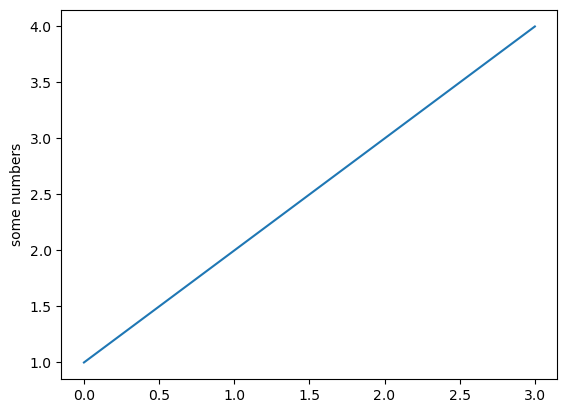

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

`You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].`

plot() is a versatile command, and will take an arbitrary number of arguments. For example, to plot x versus y, you can issue the command:

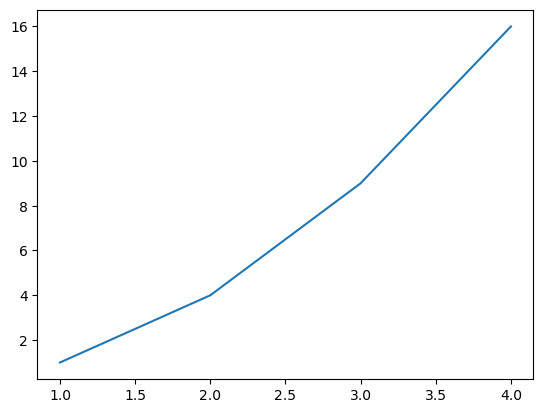

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. `The default format string is ‘b-‘, which is a solid blue line. For example, to plot the above with red circles, you would issue`

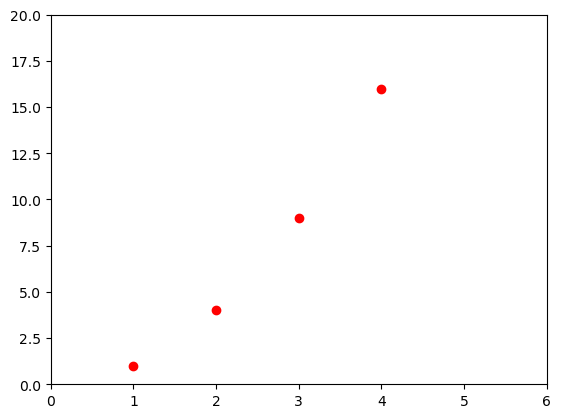

In [3]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])# x-axis 0-6 and y-axis 0-20
plt.show()

See the plot() documentation for a complete list of line styles and format strings. `The axis() command in the example above takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes.`

If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates a plotting several lines with different format styles in one command using arrays.

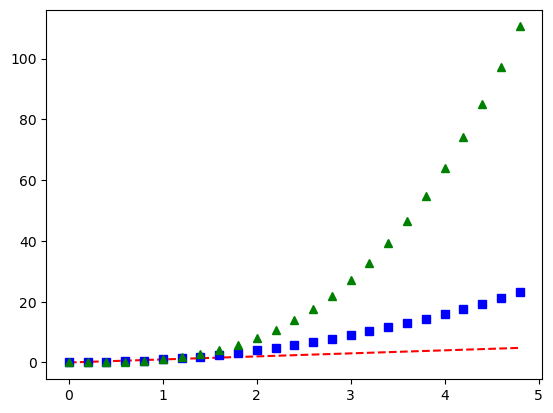

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Controlling line properties

Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see `matplotlib.lines.Line2D`. There are several ways to set line properties

* Use keyword args:

    `plt.plot(x, y, linewidth=2.0)`

* Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; e.g., line1, line2 = plot(x1, y1, x2, y2). In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list:

    `line = plt.plot(x, y, '-')`
    
    `line.set_antialiased(False) # turn off antialising`
    
Non-antialiased plotting will be faster, so if you're plotting a large amount of data, it can be worthwhile to turn it off.
    
* Use the setp() command. The example below uses a MATLAB-style command to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:

    `lines = plt.plot(x1, y1, x2, y2)`
    
     `use keyword args`
     
    `plt.setp(lines, color='r', linewidth=2.0)`
    
    `or MATLAB style string value pairs`
    
    `plt.setp(lines, 'color', 'r', 'linewidth', 2.0)`
    
Here are the available Line2D properties.

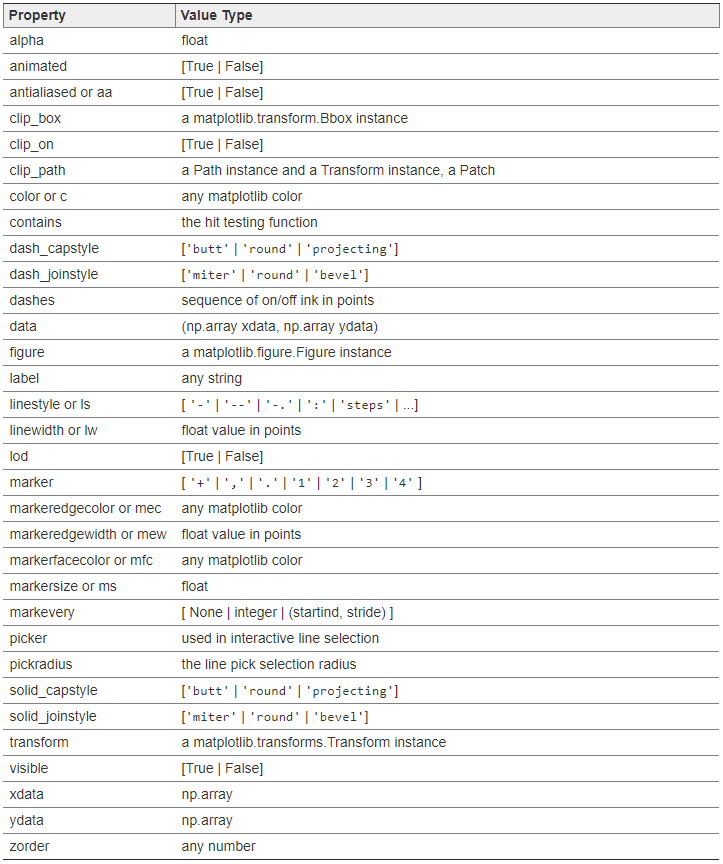

To get a list of settable line properties, call the setp() function with a line or lines as argument

`lines = plt.plot([1, 2, 3])`

`plt.setp(lines)`
    
    alpha: float
    animated: [True | False]
    antialiased or aa: [True | False]
    ...snip

## Working with multiple figures and axes
MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don’t have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

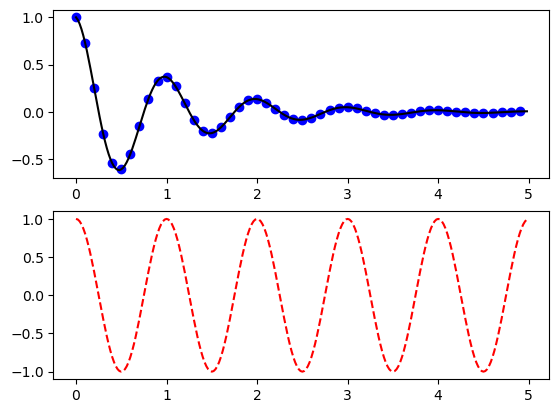

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The figure() command here is optional because figure(1) will be created by default, just as a subplot(111) will be created by default if you don’t manually specify any axes. The subplot() command specifies numrows, numcols, fignum where fignum ranges from 1 to numrows*numcols. The commas in the subplot command are optional if numrows*numcols<10. So subplot(211) is identical to subplot(2, 1, 1). You can create an arbitrary number of subplots and axes. If you want to place an axes manually, i.e., not on a rectangular grid, use the axes() command, which allows you to specify the location as axes([left, bottom, width, height]) where all values are in fractional (0 to 1) coordinates. 
You can create multiple figures by using multiple figure() calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as your heart desires:

## Changing the Figure size

To change the figure size, use the below command

`plt.figure(figsize=(20,10))`

<Figure size 640x480 with 0 Axes>

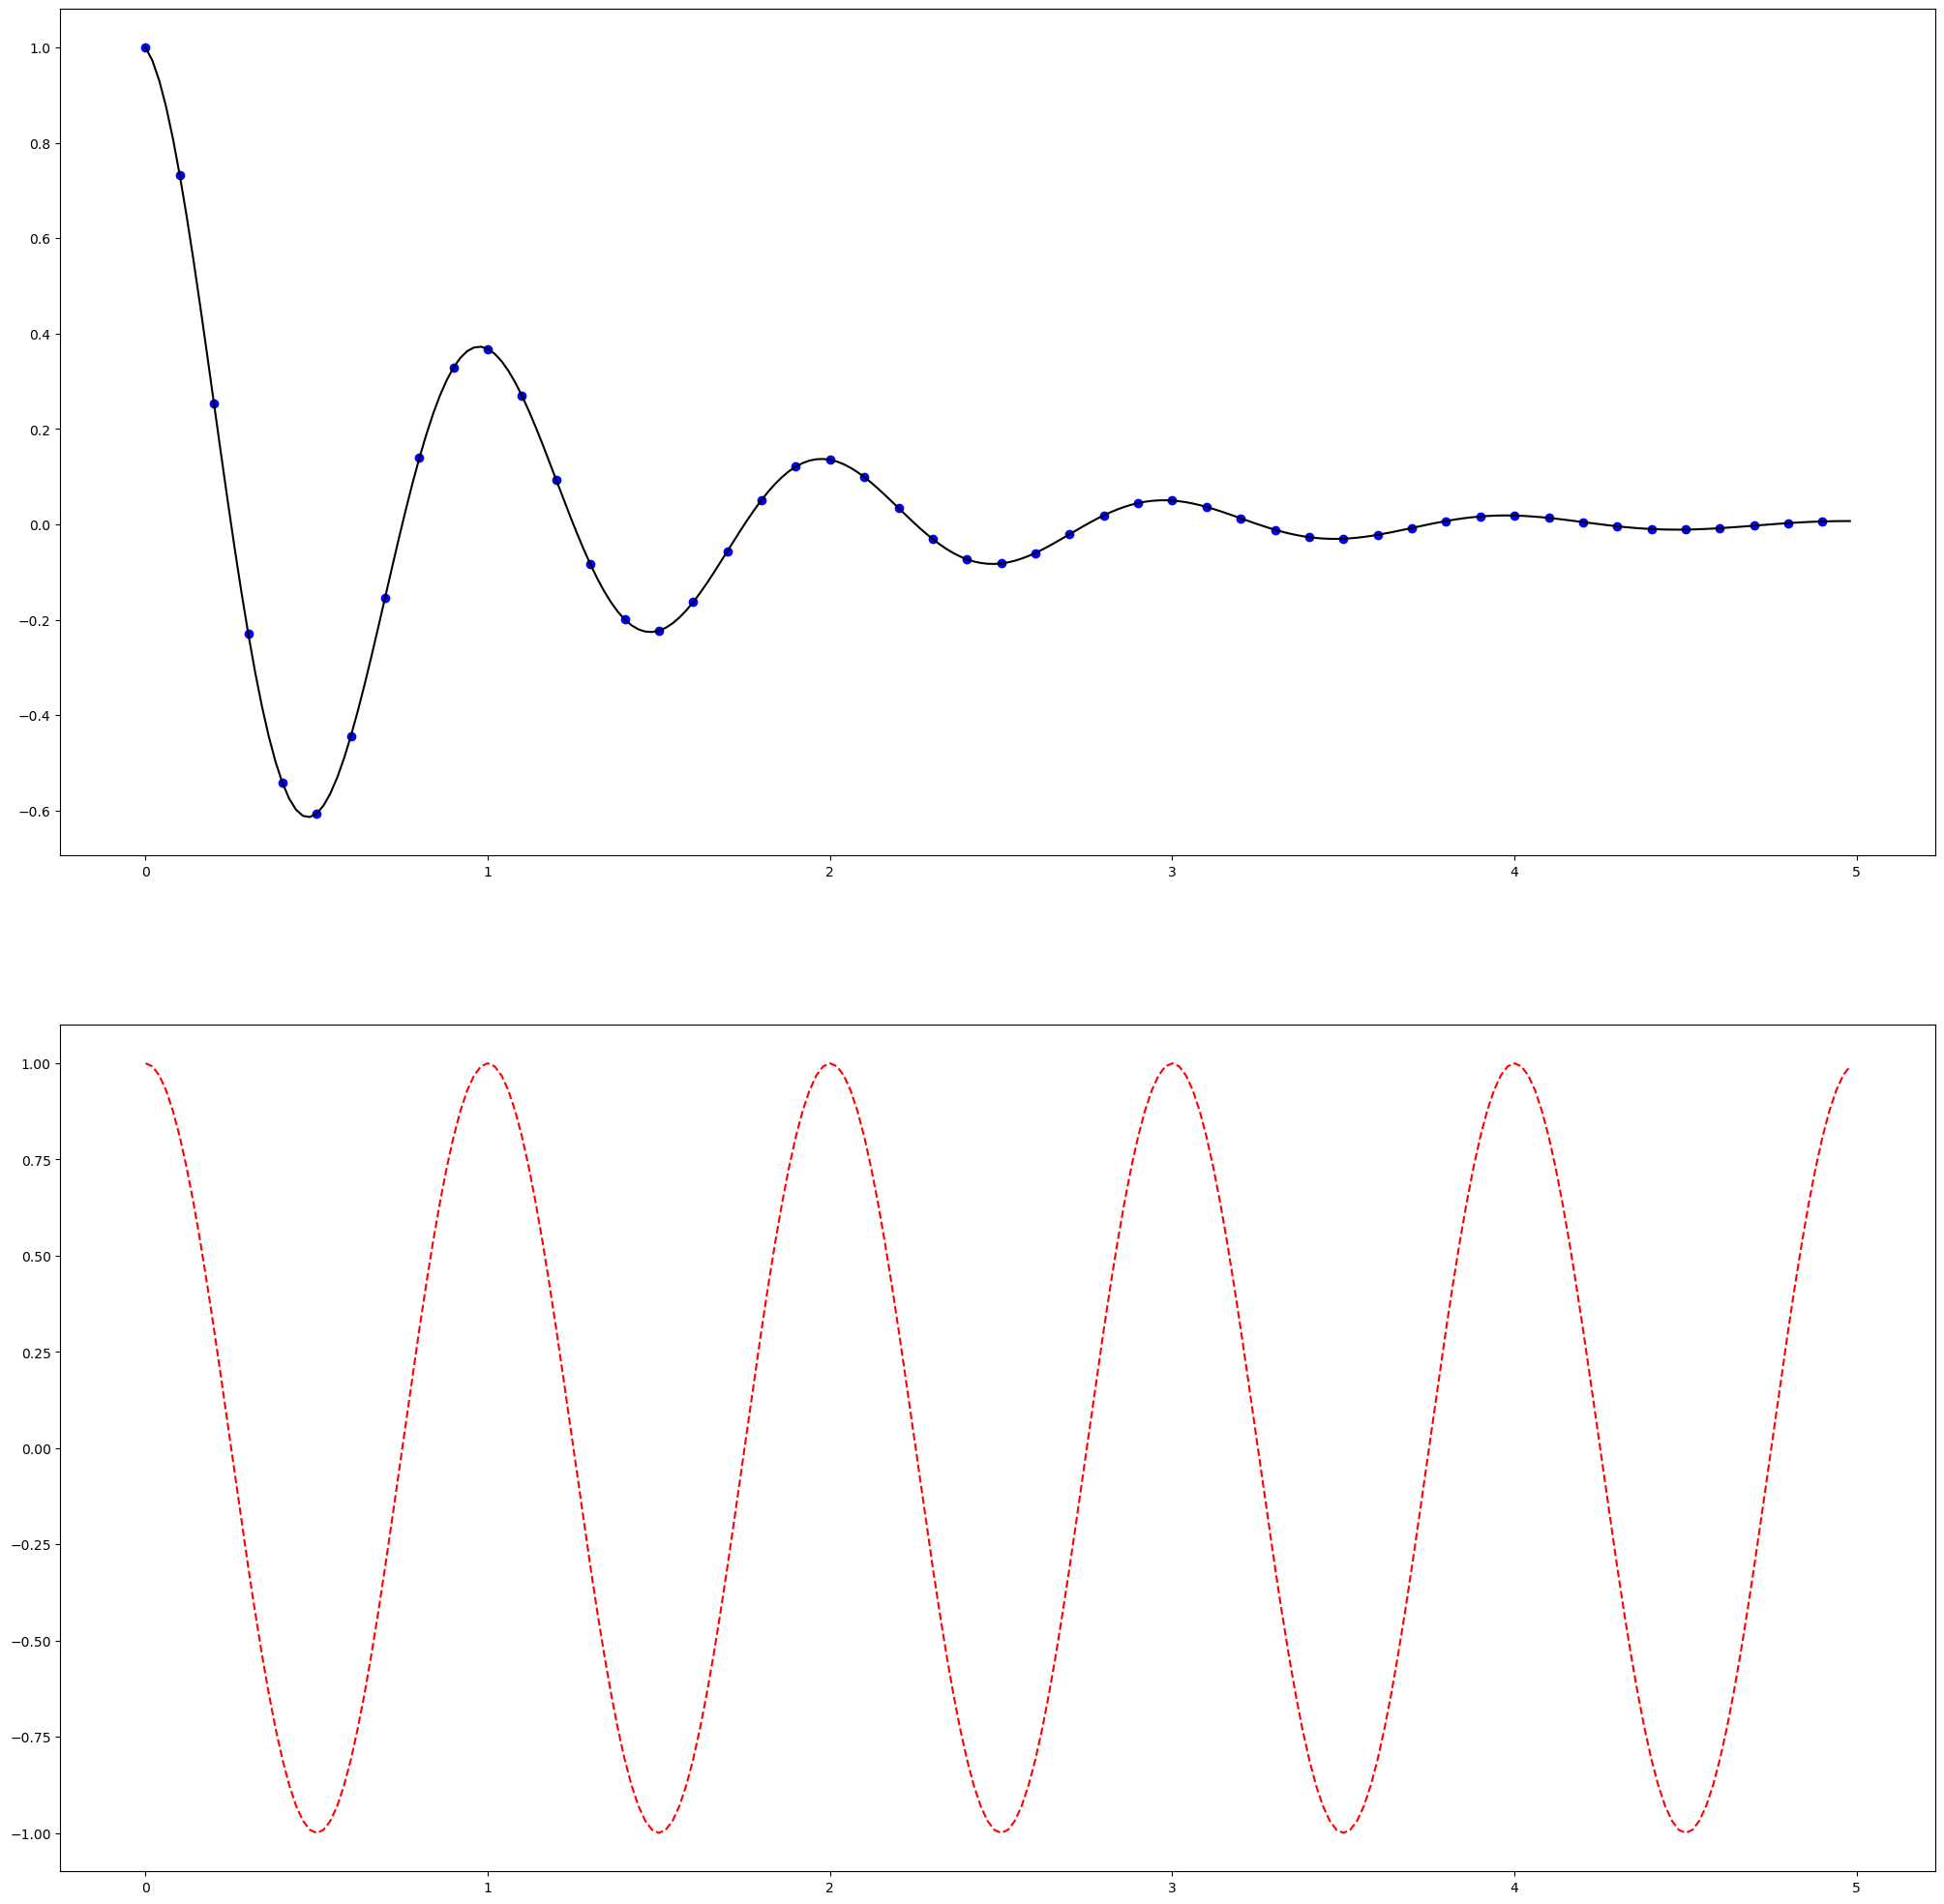

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.figure(figsize=(25,25))
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

Text(0.5, 1.0, 'Easy as 1, 2, 3')

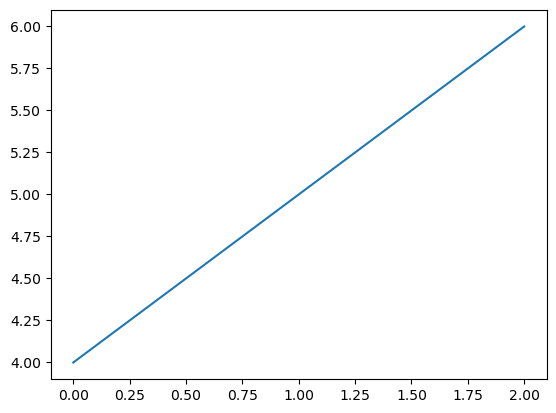

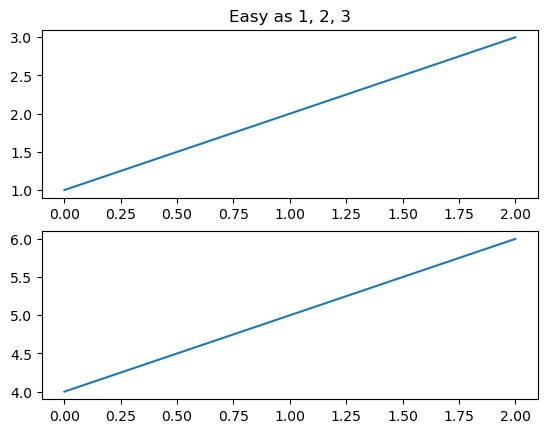

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

## Working with text
The text() command can be used to add text in an arbitrary location, and the xlabel(), ylabel() and title() are used to add text in the indicated locations (see Text introduction for a more detailed example)

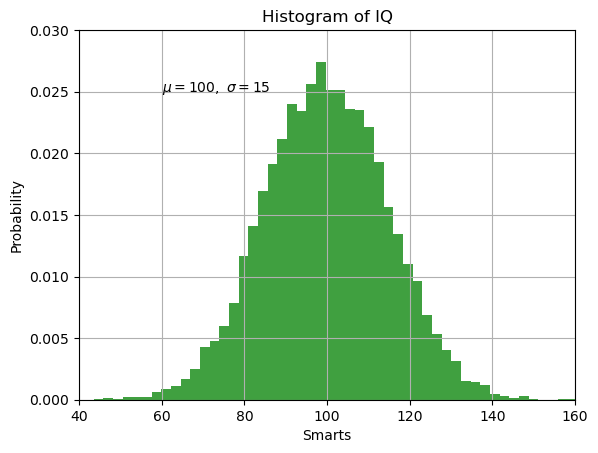

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

All of the text() commands return an matplotlib.text.Text instance. Just as with with lines above, you can customize the properties by passing keyword arguments into the text functions or using setp():

`t = plt.xlabel('my data', fontsize=14, color='red')`

## Using mathematical expressions in text
matplotlib accepts TeX equation expressions in any text expression. For example to write the expression  in the title, you can write a TeX expression surrounded by dollar signs:

`plt.title(r'$\sigma_i=15$')`

The r preceding the title string is important – it signifies that the string is a raw string and not to treat backslashes as python escapes. matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts – for details see Writing mathematical expressions. Thus you can use mathematical text across platforms without requiring a TeX installation. For those who have LaTeX and dvipng installed, you can also use LaTeX to format your text and incorporate the output directly into your display figures or saved postscript – see Text rendering With LaTeX.

## Annotating text
The uses of the basic text() command above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

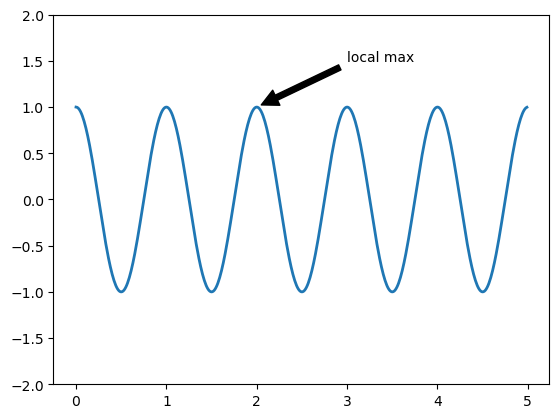

In [11]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

## Logarithmic and other nonlinear axes
matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:

`plt.xscale(‘log’)`

An example of four plots with the same data and different scales for the y axis is shown below.

<Figure size 640x480 with 0 Axes>

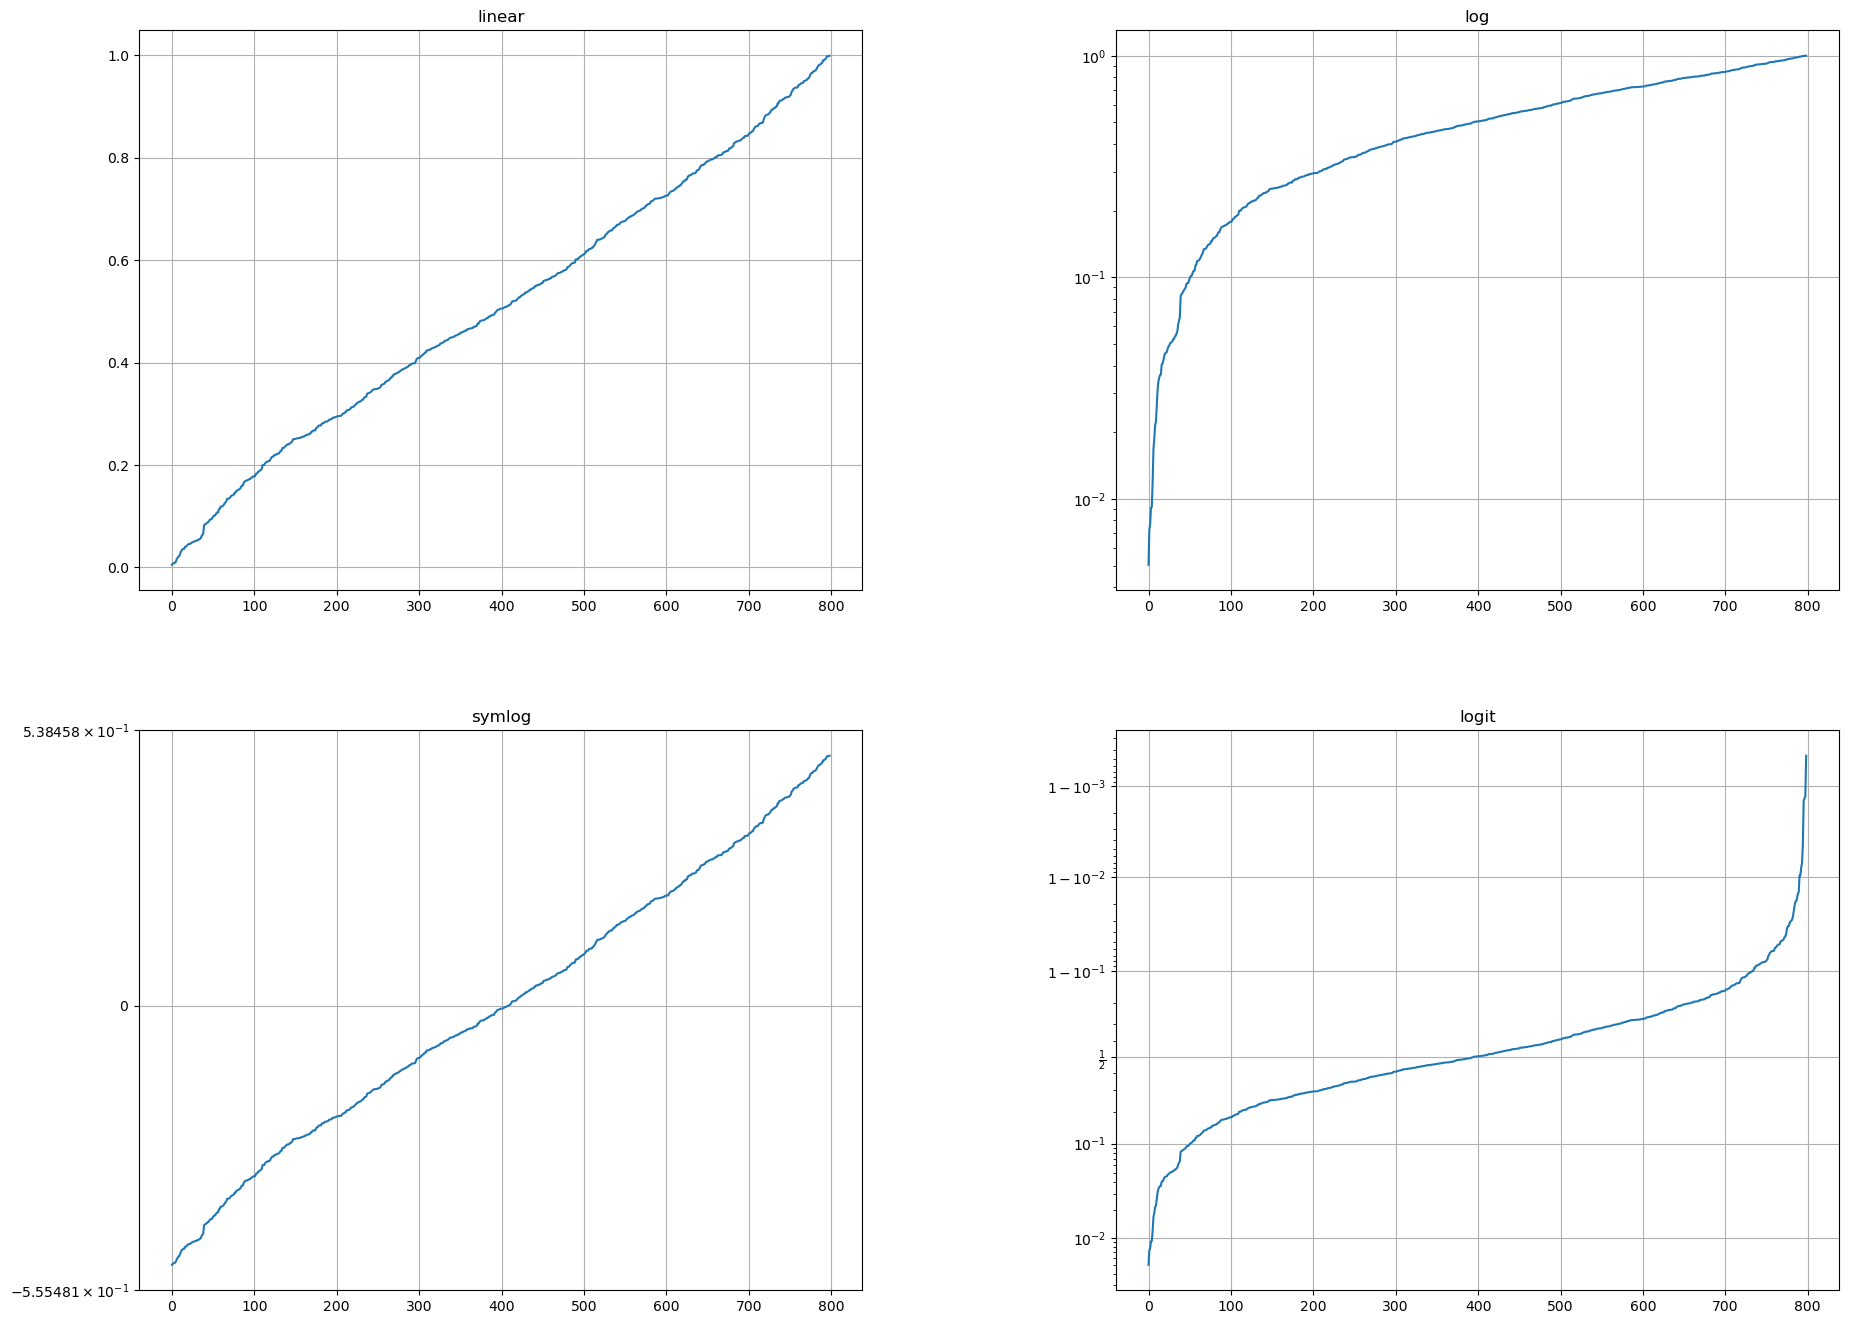

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)
plt.figure(figsize=(20,15))

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog')
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

## Customizing plots with style sheets

The style package adds support for easy-to-switch plotting “styles” with the same parameters as a matplotlibrc file.

There are a number of pre-defined styles provided by matplotlib. For example, there’s a pre-defined style called “ggplot”, which emulates the aesthetics of ggplot (a popular plotting package for R). To use this style, just add:

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

To list all available styles, use:

In [16]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


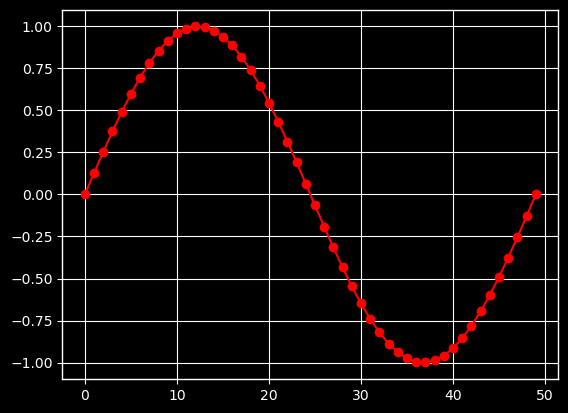

In [17]:
import numpy as np
import matplotlib.pyplot as plt
with plt.style.context(('dark_background')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

# 3.Working with text

## Text introduction

matplotlib has extensive text support, including support for mathematical expressions, truetype support for raster and vector outputs, newline separated text with arbitrary rotations, and unicode support. Because it embeds fonts directly in output documents, e.g., for postscript or PDF, what you see on the screen is what you get in the hardcopy. FreeType support produces very nice, antialiased fonts, that look good even at small raster sizes. matplotlib includes its own matplotlib.font_manager (thanks to Paul Barrett), which implements a cross platform, W3C compliant font finding algorithm.

The user has a great deal of control over text properties (font size, font weight, text location and color, etc.) with sensible defaults set in the rc file. And significantly, for those interested in mathematical or scientific figures, matplotlib implements a large number of TeX math symbols and commands, supporting mathematical expressions anywhere in your figure.

## Basic text commands

The following commands are used to create text in the pyplot interface

* text() - add text at an arbitrary location to the Axes; matplotlib.axes.Axes.text() in the API.
* xlabel() - add a label to the x-axis; matplotlib.axes.Axes.set_xlabel() in the API.
* ylabel() - add a label to the y-axis; matplotlib.axes.Axes.set_ylabel() in the API.
* title() - add a title to the Axes; matplotlib.axes.Axes.set_title() in the API.
* figtext() - add text at an arbitrary location to the Figure; matplotlib.figure.Figure.text() in the API.
* suptitle() - add a title to the Figure; matplotlib.figure.Figure.suptitle() in the API.
* annotate() - add an annotation, with optional arrow, to the Axes ; matplotlib.axes.Axes.annotate() in the API.

All of these functions create and return a matplotlib.text.Text() instance, which can be configured with a variety of font and other properties. The example below shows all of these commands in action.

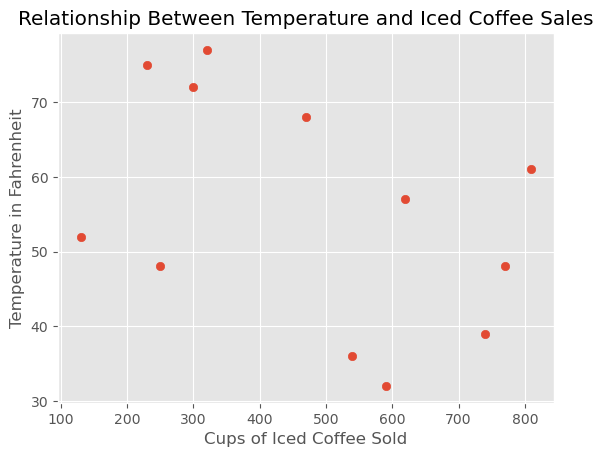

In [18]:
import matplotlib.pyplot as plt

X = [590,540,740,130,810,300,320,230,470,620,770,250]
Y = [32,36,39,52,61,72,77,75,68,57,48,48]

plt.scatter(X,Y)

plt.title('Relationship Between Temperature and Iced Coffee Sales')
plt.xlabel('Cups of Iced Coffee Sold')
plt.ylabel('Temperature in Fahrenheit')

plt.show()

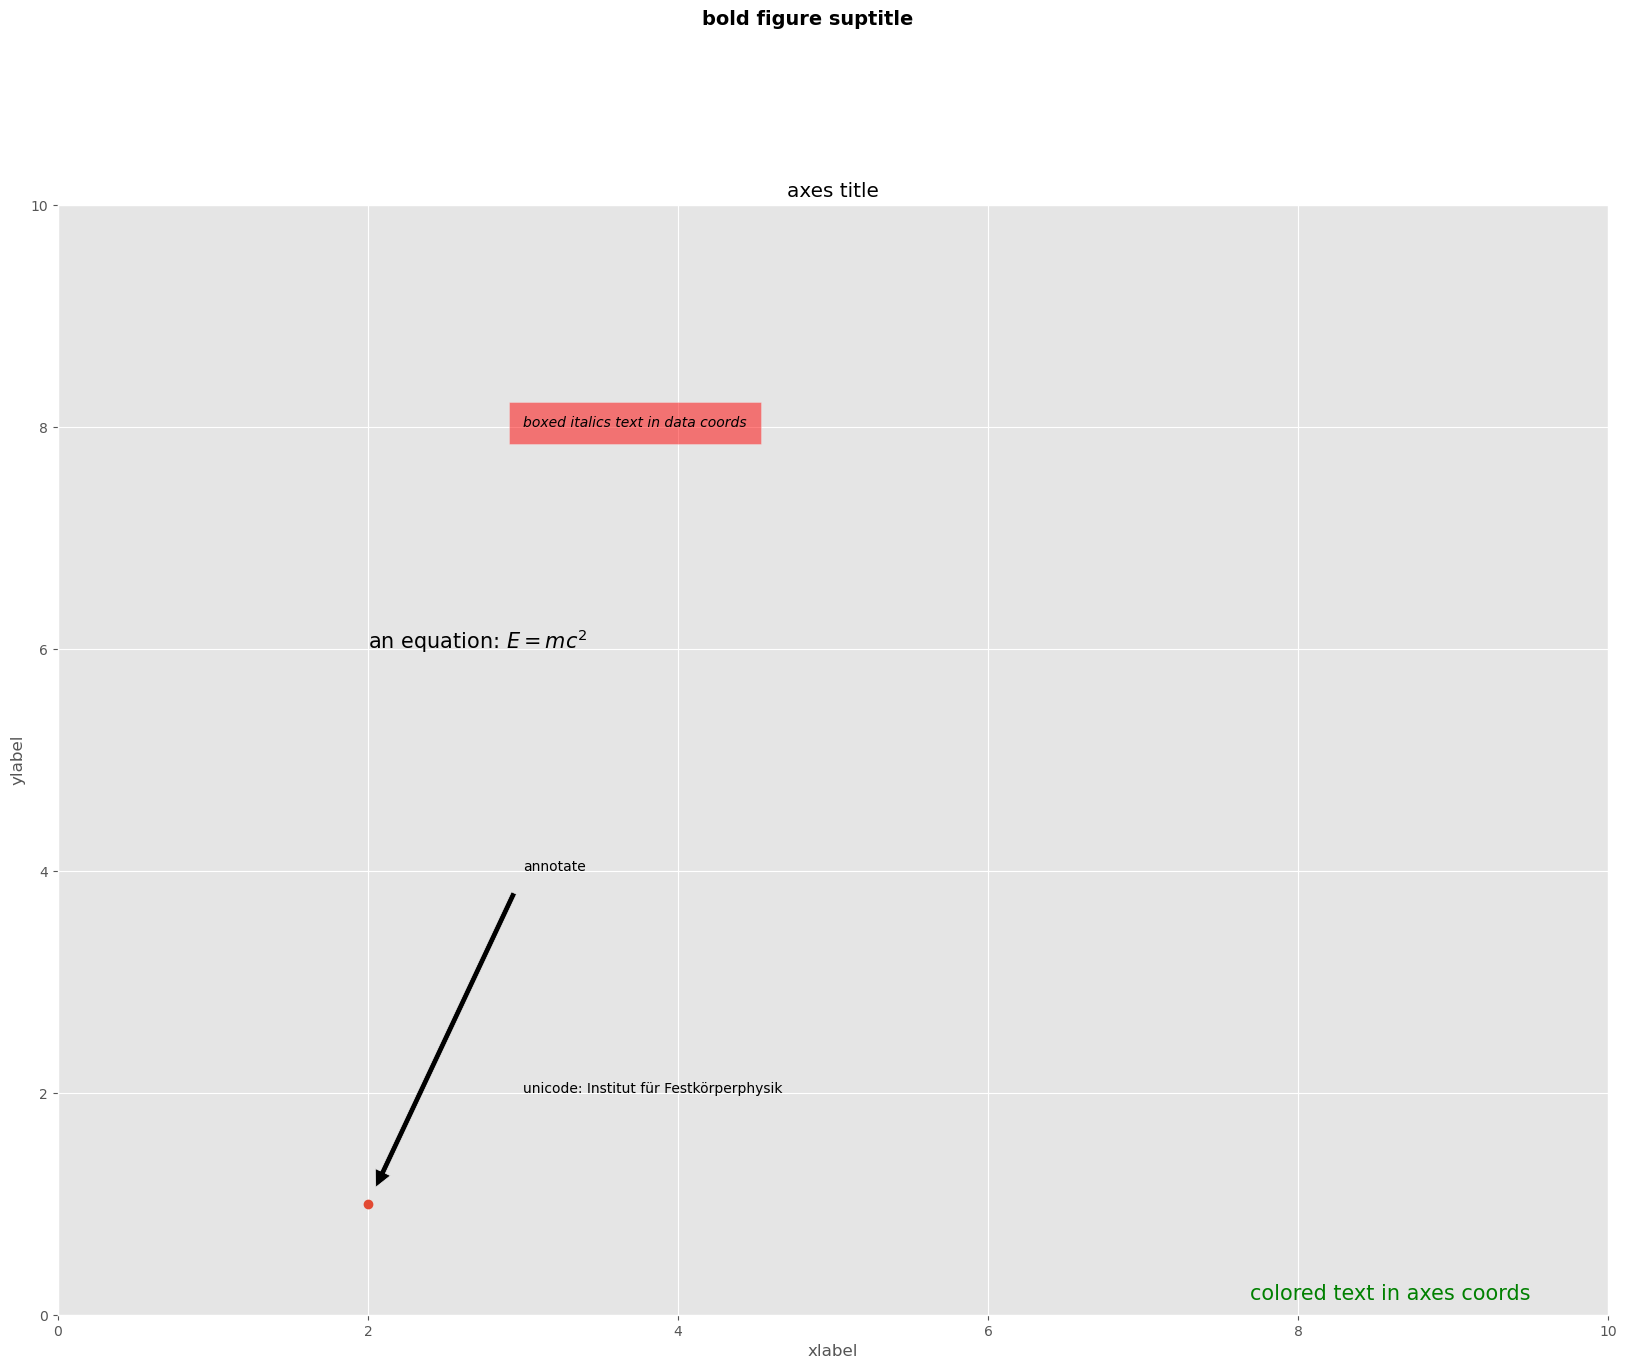

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

## Text properties and layout

The matplotlib.text.Text instances have a variety of properties which can be configured via keyword arguments to the text commands (e.g., title(), xlabel() and text()).

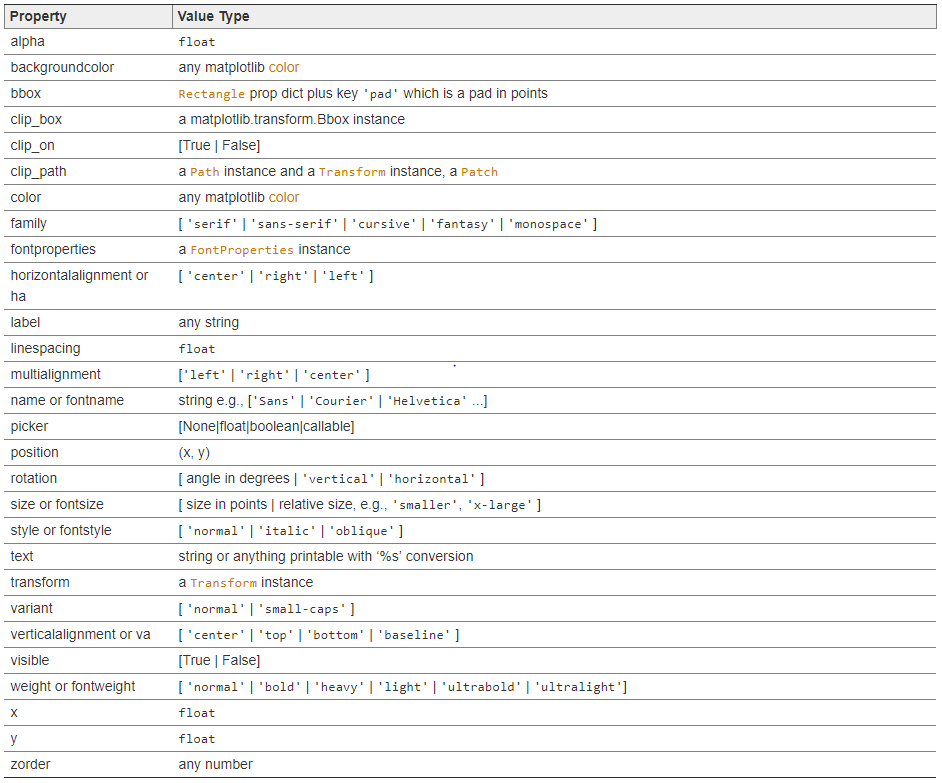

You can lay out text with the alignment arguments horizontalalignment, verticalalignment, and multialignment. horizontalalignment controls whether the x positional argument for the text indicates the left, center or right side of the text bounding box. verticalalignment controls whether the y positional argument for the text indicates the bottom, center or top side of the text bounding box. multialignment, for newline separated strings only, controls whether the different lines are left, center or right justified. Here is an example which uses the text() command to show the various alignment possibilities. The use of transform=ax.transAxes throughout the code indicates that the coordinates are given relative to the axes bounding box, with 0,0 being the lower left of the axes and 1,1 the upper right.

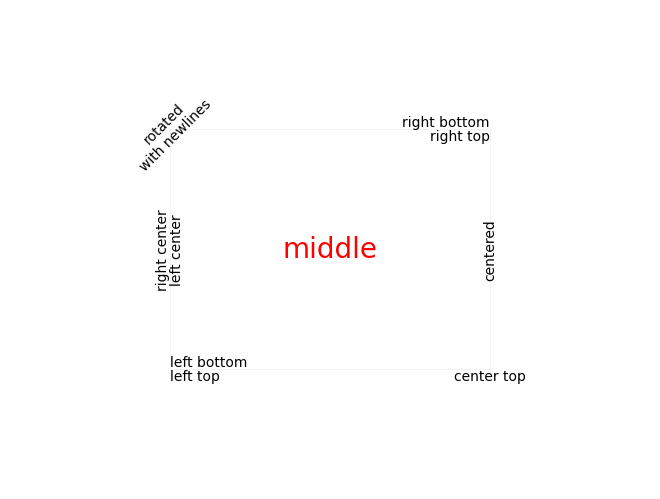

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

ax.text(left, bottom, 'left top',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, bottom, 'left bottom',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right bottom',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right top',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(right, bottom, 'center top',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom+top), 'right center',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, 0.5*(bottom+top), 'left center',
        horizontalalignment='left',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(0.5*(left+right), 0.5*(bottom+top), 'middle',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax.transAxes)

ax.text(right, 0.5*(bottom+top), 'centered',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, top, 'rotated\nwith newlines',
        horizontalalignment='center',
        verticalalignment='center',
        rotation=45,
        transform=ax.transAxes)

ax.set_axis_off()
plt.show()

## Default Font

The base default font is controlled by a set of rcParams:

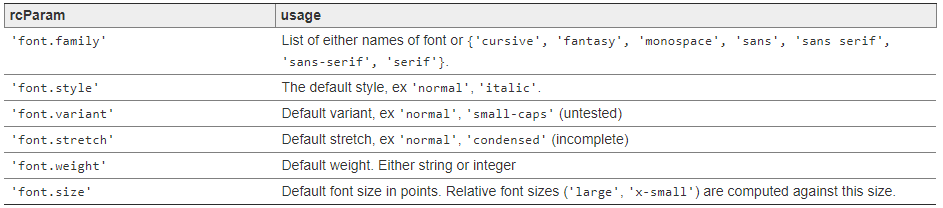

The mapping between the family aliases ({'cursive', 'fantasy', 'monospace', 'sans', 'sans serif', 'sans-serif', 'serif'}) and actual font names is controlled by the following rcParams:

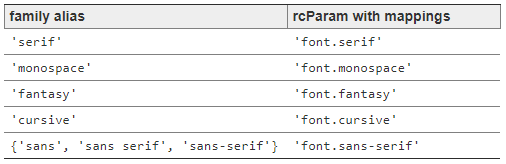

## Customizing a Plot
Every data set we work with will be unique and it's important to be able to customize how we would like to display our information. Remember visualization is also an art, so get creative with it! matplotlib includes many customization features, such as different colors, point symbols, and sizing. Depending on our needs, we may want to play around with different scales, using different ranges for our axes. We can change the default parameters by designating new ranges for the axes, like so:

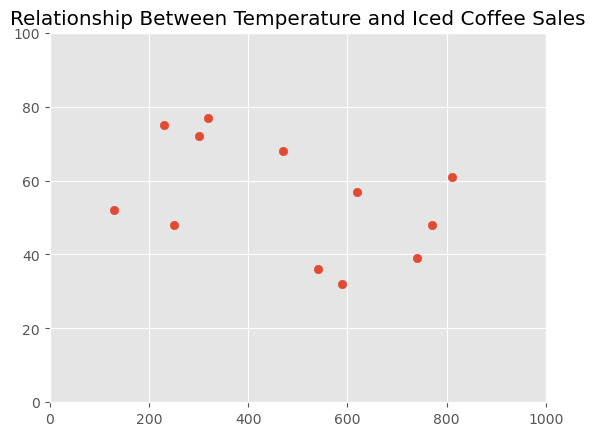

In [21]:
import matplotlib.pyplot as plt

X = [590,540,740,130,810,300,320,230,470,620,770,250]
Y = [32,36,39,52,61,72,77,75,68,57,48,48]

plt.scatter(X,Y)

plt.xlim(0,1000)
plt.ylim(0,100)

plt.title('Relationship Between Temperature and Iced Coffee Sales')

plt.show()

The points from the original plot did look a bit small and blue may not be the color we want. Perhaps we want triangles instead of circles for our points. If we want to change the actual color/size/shape of the points, we have to make these changes in the initial plt.scatter() call. We'll change the following parameters:

* s: size of point, default = 20
* c: color, sequence, or sequence of color, default = 'b'
* marker: point symbol, default = 'o'

Possible markers include a number of different shapes, such as diamonds, hexagons, stars, and so on. Color choices include, but are not limited to blue, green, red, and magenta. It is also possible to provide an HTML hex string for color. See matplotlib's documentation for comprehensive lists of possible markers and colors.

To make our plot easier to read, let's triple the size of the points (s=60), change the color to red (c='r'), and change the symbol to a triangle (marker='^'). We'll modify the plt.scatter() function:

`plt.scatter(X, Y, s=60, c='red', marker='^')`

Before running our updated script, we can double check that our code is right. The updated script for the custom plot should look something like this:

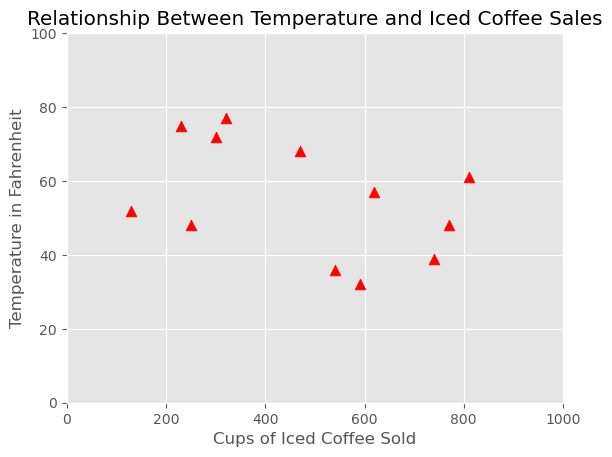

In [22]:
import matplotlib.pyplot as plt


X = [590,540,740,130,810,300,320,230,470,620,770,250]
Y = [32,36,39,52,61,72,77,75,68,57,48,48]

#scatter plot
plt.scatter(X, Y, s=60, c='red', marker='^')

#change axes ranges
plt.xlim(0,1000)
plt.ylim(0,100)

#add title
plt.title('Relationship Between Temperature and Iced Coffee Sales')

#add x and y labels
plt.xlabel('Cups of Iced Coffee Sold')
plt.ylabel('Temperature in Fahrenheit')

#show plot
plt.show()

# 4.Legends

In this tutorial, we're going to cover legends within Matplotlib. A lot of times, graphs can be self-explanatory, but having legend that explains what each line is can be necessary when we are trying to plot multiple things.



## Creating artists specifically for adding to the legend (aka. Proxy artists)
Not all handles can be turned into legend entries automatically, so it is often necessary to create an artist which can. Legend handles don’t have to exists on the Figure or Axes in order to be used.

Suppose we wanted to create a legend which has an entry for some data which is represented by a red color:

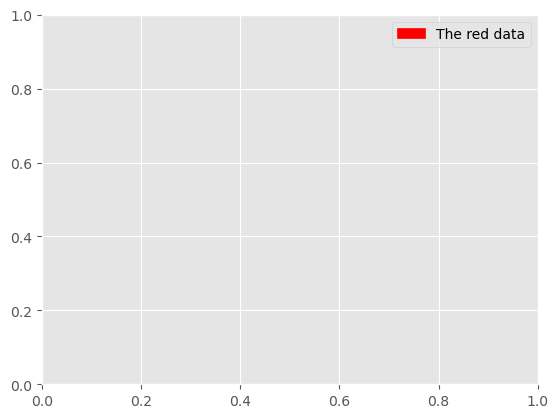

In [23]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

plt.show()

There are many supported legend handles, instead of creating a patch of color we could have created a line with a marker:

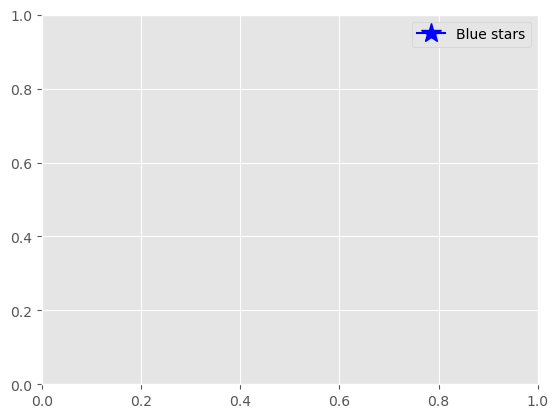

In [24]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')
plt.legend(handles=[blue_line])

plt.show()

## Legend Locations

The location of the legend can be specified by the keyword argument loc. Please see the documentation at legend() for more details.

The bbox_to_anchor keyword gives a great degree of control for manual legend placement. For example, if you want your axes legend located at the figure’s top right-hand corner instead of the axes’ corner, simply specify the corner’s location, and the coordinate system of that location:

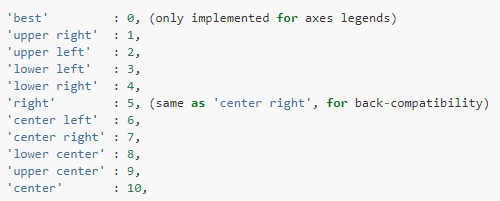


`plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)`
           
More examples of custom legend placement:

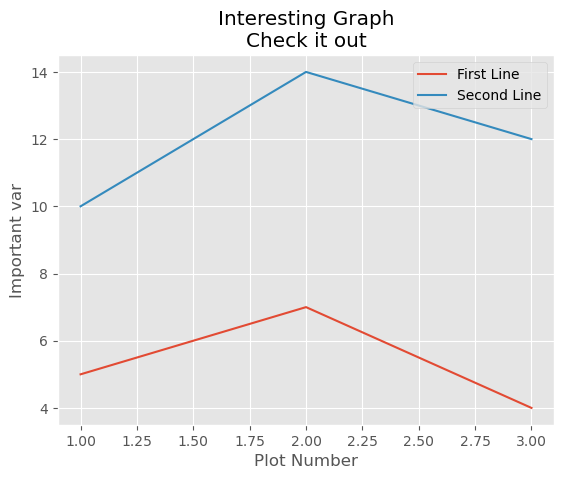

In [25]:
import matplotlib.pyplot as plt

x = [1,2,3]
y = [5,7,4]

x2 = [1,2,3]
y2 = [10,14,12]
plt.plot(x, y, label='First Line')
plt.plot(x2, y2, label='Second Line')
plt.xlabel('Plot Number')
plt.ylabel('Important var')
plt.title('Interesting Graph\nCheck it out')
plt.legend(loc = 1)
#plt.legend(loc = 2)
#plt.legend(loc = 3)
#plt.legend(loc = 4)
#plt.legend(loc = 5)
#plt.legend(loc = 6)
#plt.legend(loc = 8)
#plt.legend(loc = 9)
#plt.legend(loc = 10)
plt.show()

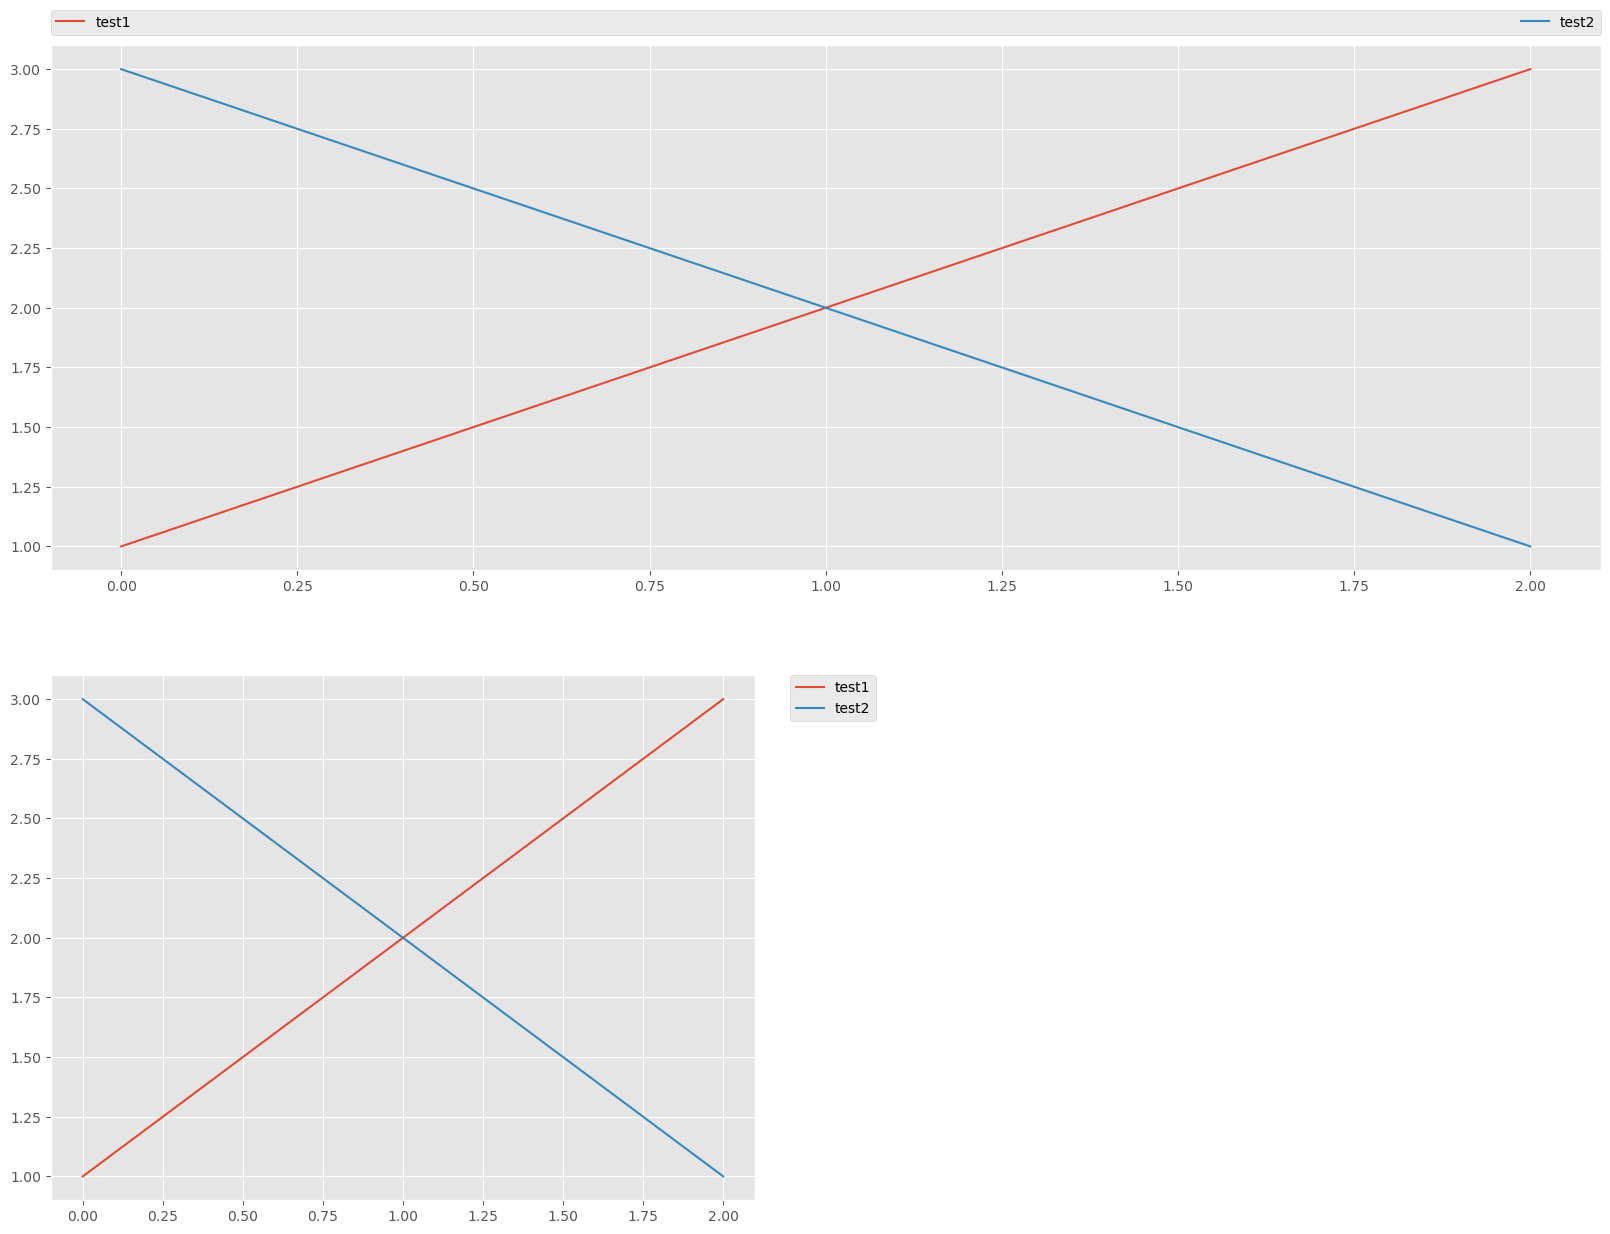

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.subplot(211)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## Multiple legends on the same Axes
Sometimes it is more clear to split legend entries across multiple legends. Whilst the instinctive approach to doing this might be to call the legend() function multiple times, you will find that only one legend ever exists on the Axes. This has been done so that it is possible to call legend() repeatedly to update the legend to the latest handles on the Axes, so to persist old legend instances, we must add them manually to the Axes:

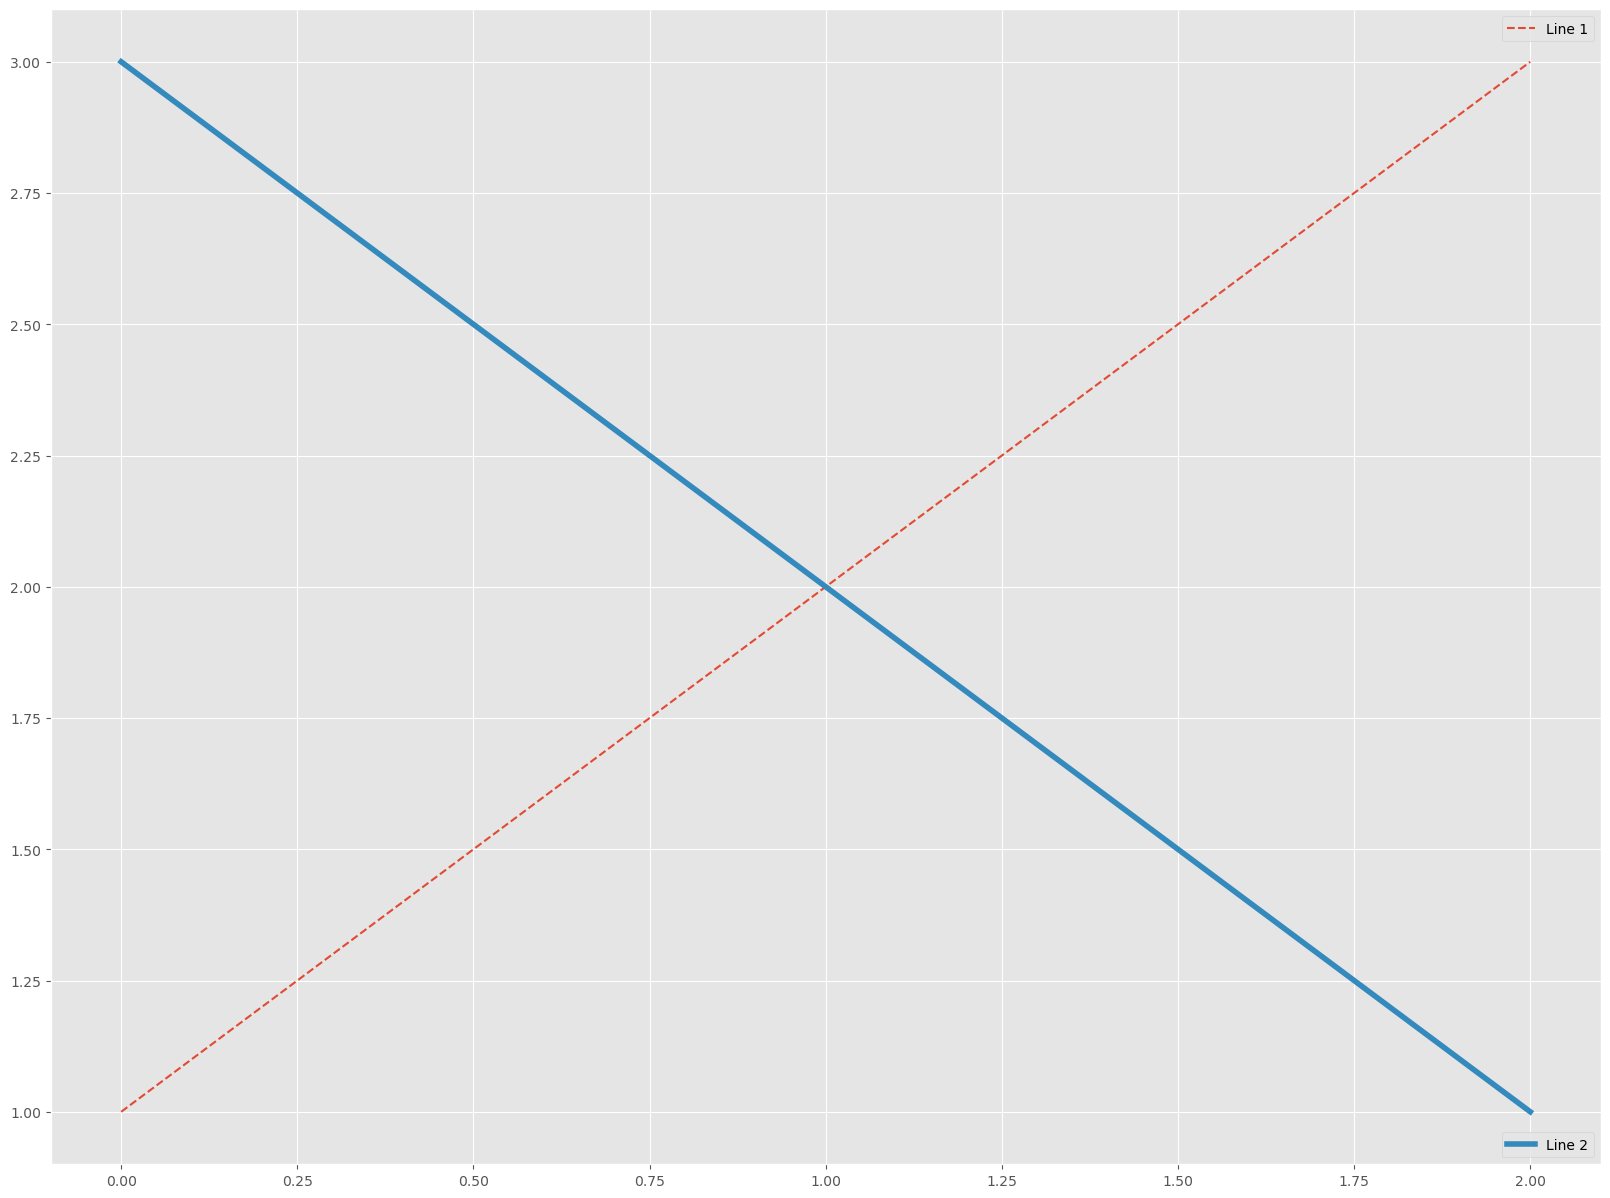

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
line2, = plt.plot([3,2,1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)

plt.show()

## Legend Handlers
In order to create legend entries, handles are given as an argument to an appropriate HandlerBase subclass. The choice of handler subclass is determined by the following rules:

* Update get_legend_handler_map() with the value in the handler_map keyword.
* Check if the handle is in the newly created handler_map.
* Check if the type of handle is in the newly created handler_map.
* Check if any of the types in the handle‘s mro is in the newly created handler_map.

For completeness, this logic is mostly implemented in get_legend_handler().

All of this flexibility means that we have the necessary hooks to implement custom handlers for our own type of legend key.

The simplest example of using custom handlers is to instantiate one of the existing HandlerBase subclasses. For the sake of simplicity, let’s choose matplotlib.legend_handler.HandlerLine2D which accepts a numpoints argument (note numpoints is a keyword on the legend() function for convenience). We can then pass the mapping of instance to Handler as a keyword to legend.

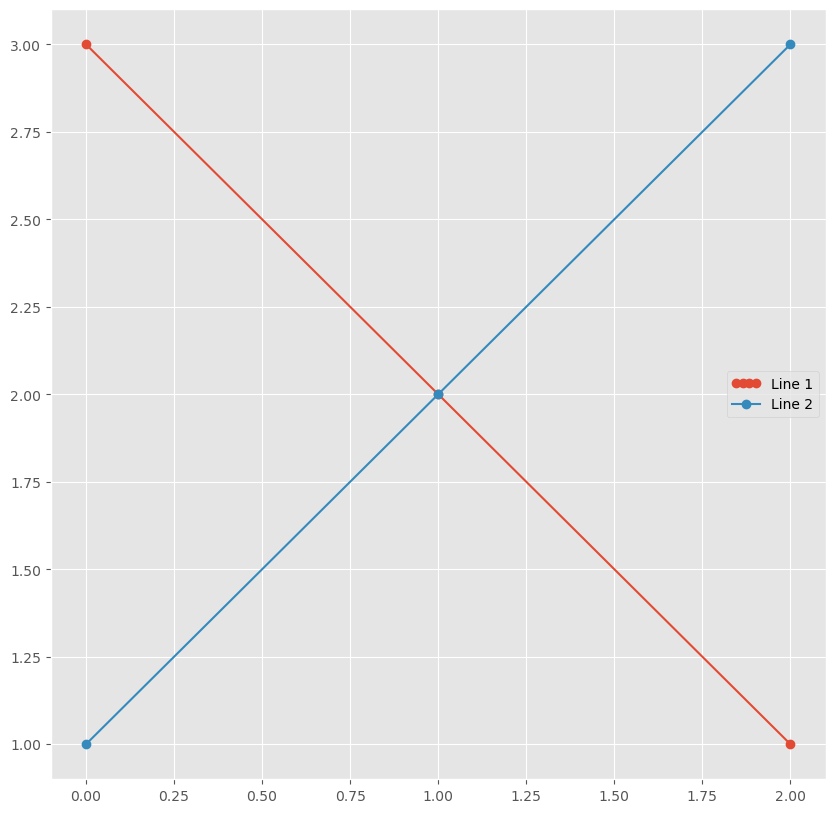

In [28]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(10,10))
line1, = plt.plot([3,2,1], marker='o', label='Line 1')
line2, = plt.plot([1,2,3], marker='o', label='Line 2')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

As you can see, “Line 1” now has 4 marker points, where “Line 2” has 2 (the default). Try the above code, only change the map’s key from line1 to type(line1). Notice how now both Line2D instances get 4 markers.

Along with handlers for complex plot types such as errorbars, stem plots and histograms, the default handler_map has a special tuple handler (HandlerTuple) which simply plots the handles on top of one another for each item in the given tuple. The following example demonstrates combining two legend keys on top of one another:

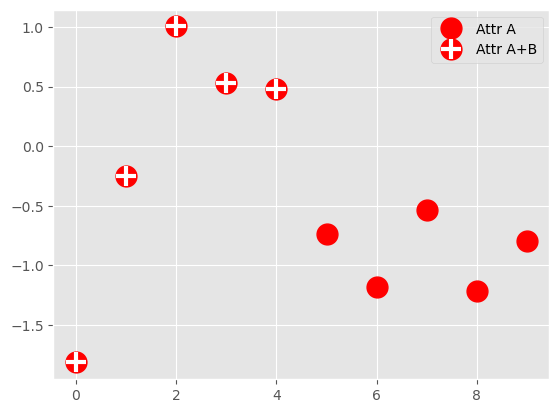

In [29]:
import matplotlib.pyplot as plt
from numpy.random import randn

z = randn(10)

red_dot, = plt.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"], loc=0)

## Implementing a custom legend handler
A custom handler can be implemented to turn any handle into a legend key (handles don’t necessarily need to be matplotlib artists). The handler must implement a “legend_artist” method which returns a single artist for the legend to use. Signature details about the “legend_artist” are documented at legend_artist().

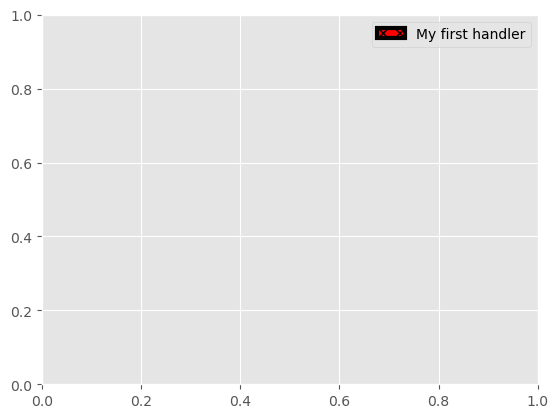

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
class AnyObject(object):
    pass

class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
                                   edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch

plt.legend([AnyObject()], ['My first handler'],
           handler_map={AnyObject: AnyObjectHandler()})


Alternatively, had we wanted to globally accept AnyObject instances without needing to manually set the handler_map keyword all the time, we could have registered the new handler with:

`from matplotlib.legend import Legend
Legend.update_default_handler_map({AnyObject: AnyObjectHandler()})`

Whilst the power here is clear, remember that there are already many handlers implemented and what you want to achieve may already be easily possible with existing classes. For example, to produce elliptical legend keys, rather than rectangular ones:

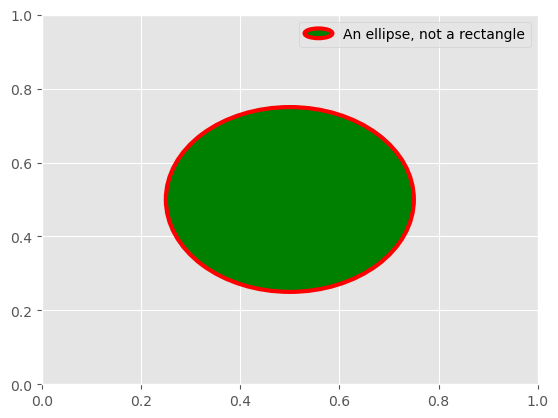

In [31]:
from matplotlib.legend_handler import HandlerPatch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)
plt.gca().add_patch(c)

plt.legend([c], ["An ellipse, not a rectangle"],
           handler_map={mpatches.Circle: HandlerEllipse()})

# 5.Examples

## Using defaults

Matplotlib comes with a set of default settings that allow customizing all kinds of properties. You can control the defaults of almost every property in matplotlib: figure size and dpi, line width, color and style, axes, axis and grid properties, text and font properties and so on. While matplotlib defaults are rather good in most cases, you may want to modify some properties for specific cases.

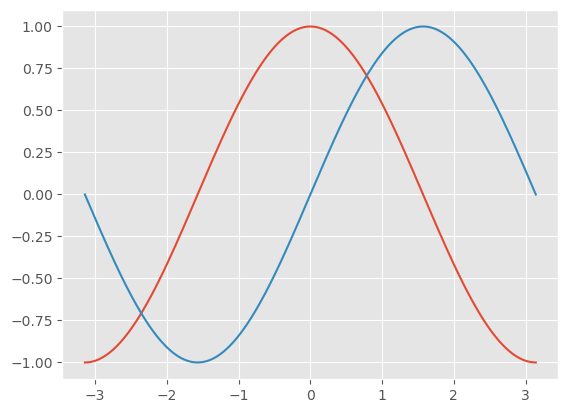

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C)
plt.plot(X,S)


## Instantiating defaults

In the script below, we've instantiated (and commented) all the figure settings that influence the appearance of the plot. The settings have been explicitly set to their default values, but now you can interactively play with the values to explore their affect (see Line properties and Line styles below). `Change Changing colors and line widths, ticks,limits etc`

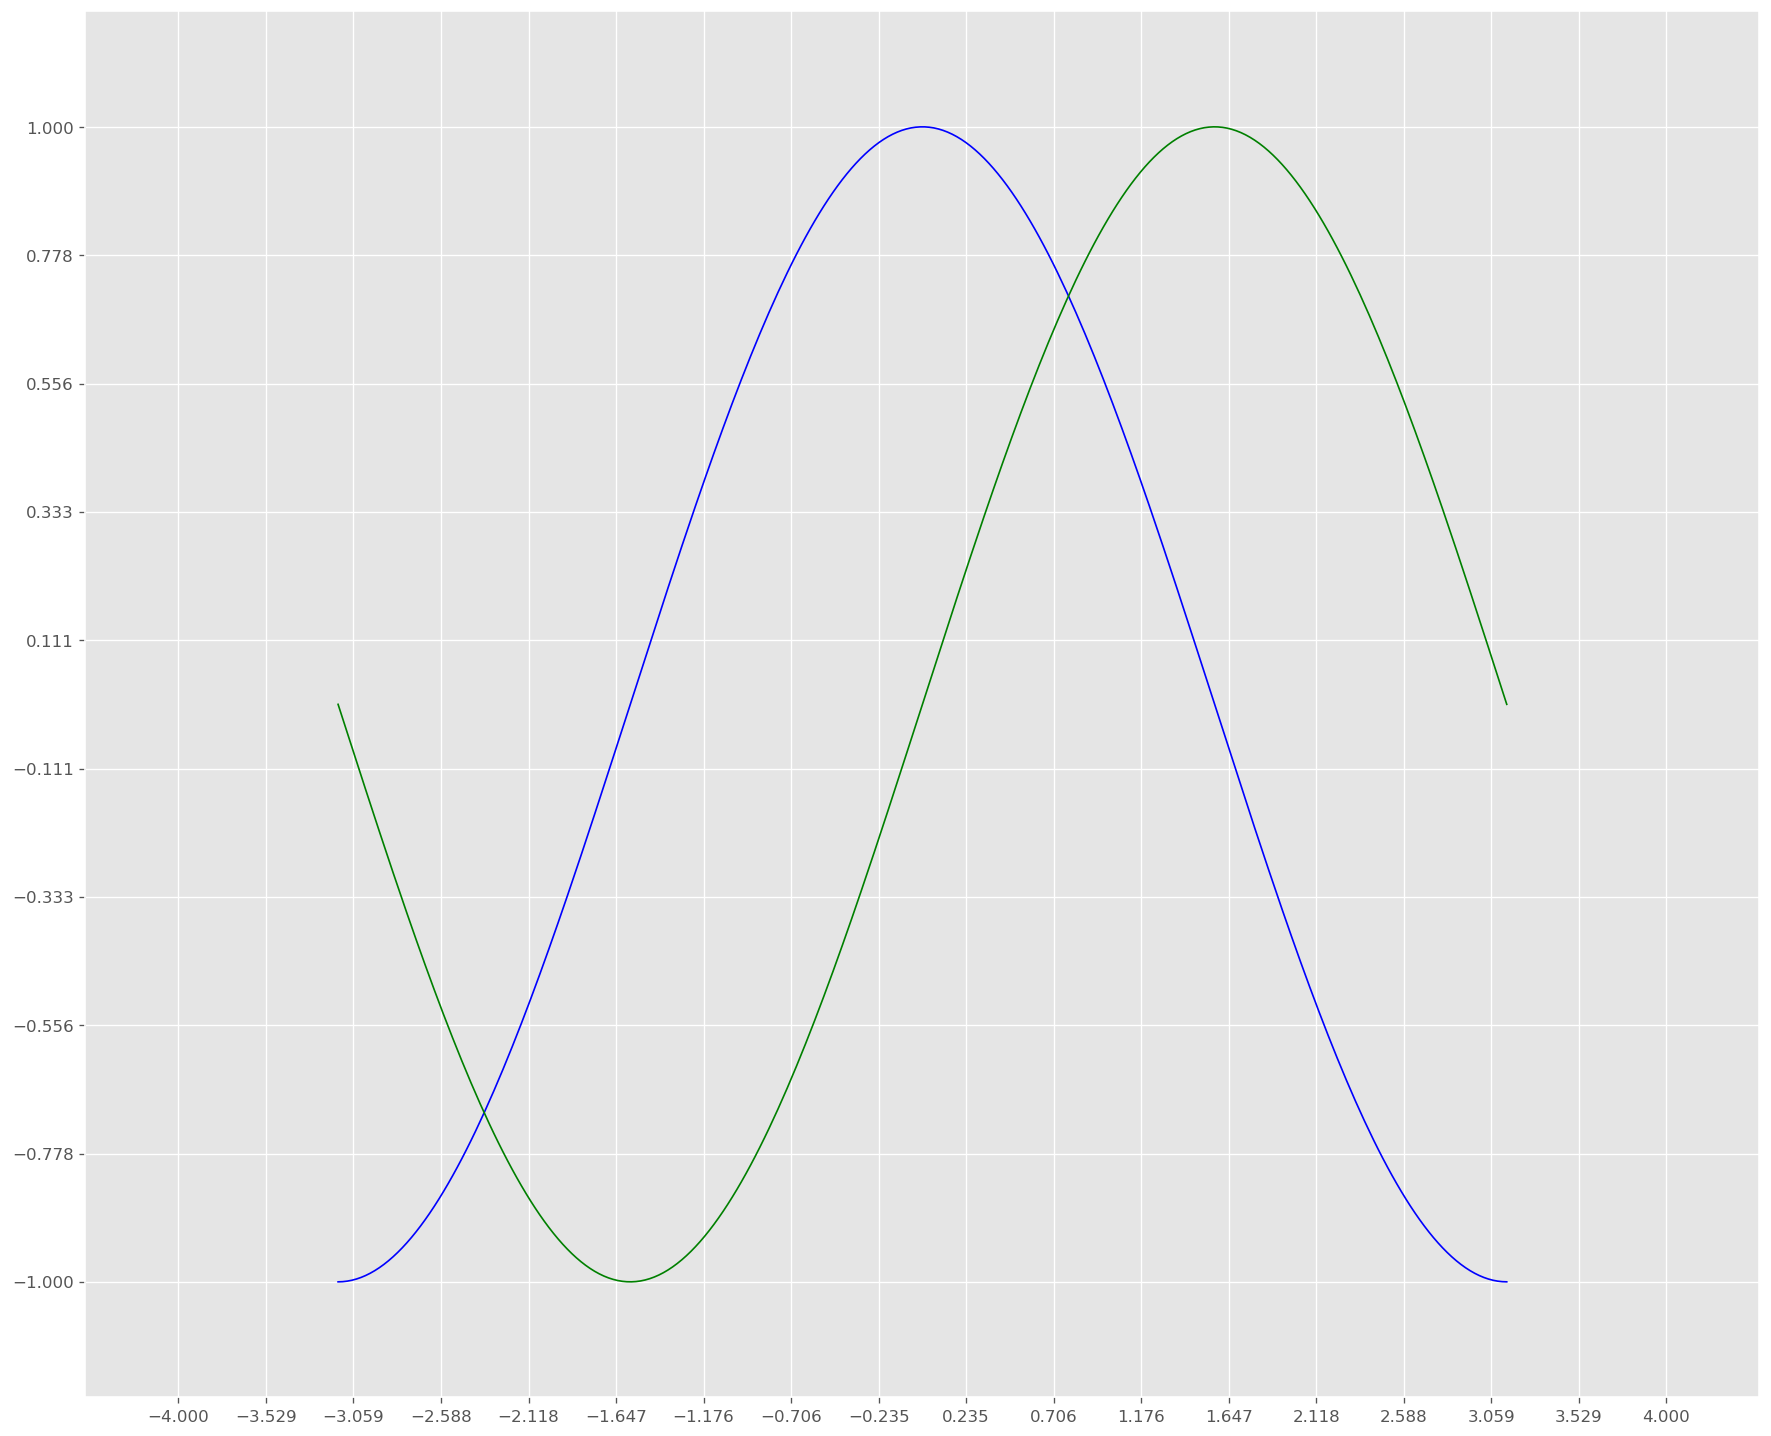

In [33]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Create a new figure of size 8x6 points, using 100 dots per inch
plt.figure(figsize=(18,15), dpi=120)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

# Plot cosine using blue color with a continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine using green color with a continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.5,4.5)

# Set x ticks
plt.xticks(np.linspace(-4,4,18,endpoint=True))

# Set y limits
plt.ylim(-1.2,1.2)

# Set y ticks
plt.yticks(np.linspace(-1,1,10,endpoint=True))

# Save figure using 72 dots per inch
# savefig("../figures/exercice_2.png",dpi=72)

# Show result on screen
plt.show()

## Example 3 Setting Ticks and Tick Labels

Current ticks are not ideal because they do not show the interesting values (+/-π,+/-π/2) for sine and cosine. We'll change them such that they show only these values.



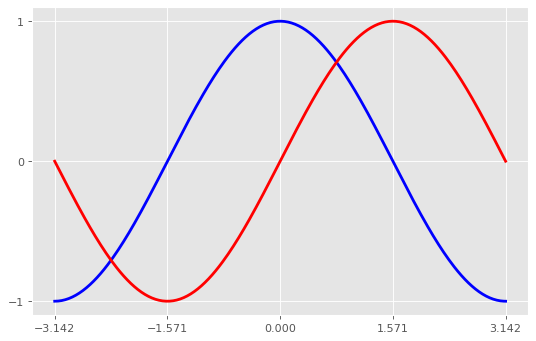

In [34]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), dpi=80)
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
S = np.sin(X)
C = np.cos(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])

plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.yticks([-1, 0, +1])

plt.show()

Ticks are now properly placed but their label is not very explicit. We could guess that 3.142 is π but it would be better to make it explicit. When we set tick values, we can also provide a corresponding label in the second argument list. Note that we'll use latex to allow for nice rendering of the label.

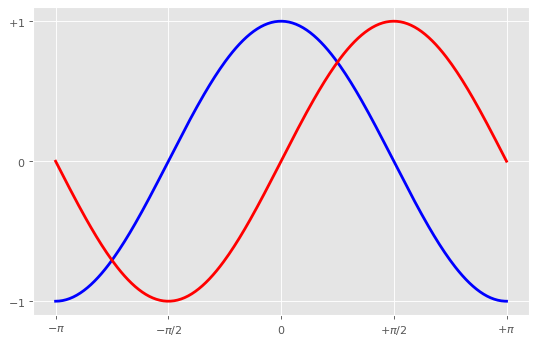

In [35]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), dpi=80)
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C = np.cos(X)
S = np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])

plt.show()

## Moving Splines

Spines are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions and until now, they were on the border of the axis. We'll change that since we want to have them in the middle. Since there are four of them (top/bottom/left/right), we'll discard the top and right by setting their color to none and we'll move the bottom and left ones to coordinate 0 in data space coordinates.

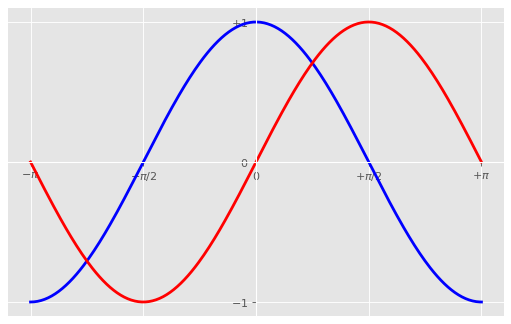

In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5), dpi=80)
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C = np.cos(X)
S = np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])

plt.show()

# 6.Writing mathematical expressions

You can use a subset TeX markup in any matplotlib text string by placing it inside a pair of dollar signs ($).

Note that you do not need to have TeX installed, since matplotlib ships its own TeX expression parser, layout engine and fonts. The layout engine is a fairly direct adaptation of the layout algorithms in Donald Knuth’s TeX, so the quality is quite good (matplotlib also provides a usetex option for those who do want to call out to TeX to generate their text 

Any text element can use math text. You should use raw strings (precede the quotes with an 'r'), and surround the math text with dollar signs ($), as in TeX. Regular text and mathtext can be interleaved within the same string. Mathtext can use DejaVu Sans (default), DejaVu Serif, the Computer Modern fonts (from (La)TeX), STIX fonts (with are designed to blend well with Times), or a Unicode font that you provide. The mathtext font can be selected with the customization variable mathtext.fontset

Here is a simple example:

#### plain text
alpha > beta

#### math text
$\alpha > \beta$

### Subscripts and superscripts
To make subscripts and superscripts, use the '_' and '^' symbols:

$\alpha_i > \beta_i$

Some symbols automatically put their sub/superscripts under and over the operator. For example, to write the sum of  from  to , you could do:

$\sum_{i=0}^\infty x_i$

### Fractions, binomials and stacked numbers
Fractions, binomials and stacked numbers can be created with the \frac{}{}, \binom{}{} and \stackrel{}{} commands, respectively:


$\frac{3}{4} \binom{3}{4} \stackrel{3}{4}$

Fractions can be arbitrarily nested:

$\frac{5 - \frac{1}{x}}{4}$

### For more

https://matplotlib.org/users/mathtext.html

## Adding Legend And Annotations

Let's add a legend in the upper left corner. This only requires adding the keyword argument label (that will be used in the legend box) to the plot commands. 

Let's annotate some interesting points using the annotate command. We chose the 2π/3 value and we want to annotate both the sine and the cosine. We'll first draw a marker on the curve as well as a straight dotted line. Then, we'll use the annotate command to display some text with an arrow.

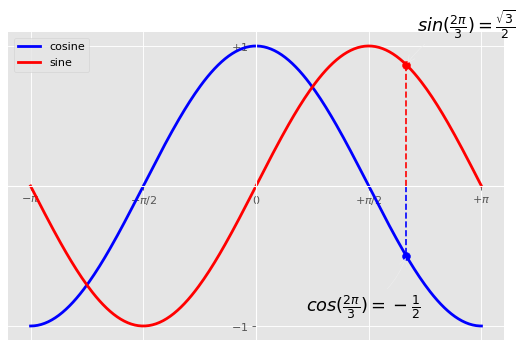

In [37]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), dpi=80)
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C = np.cos(X)
S = np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine")

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min() * 1.1, C.max() * 1.1)
plt.yticks([-1, +1],
          [r'$-1$', r'$+1$'])

t = 2*np.pi/3
plt.plot([t, t], [0, np.cos(t)],
        color='blue', linewidth=1.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')
plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(t, np.sin(t)), xycoords='data',
            xytext=(+10, +30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t], [0, np.sin(t)],
        color='red', linewidth=1.5, linestyle="--")
plt.scatter([t, ], [np.sin(t), ], 50, color='red')
plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$', xy=(t, np.cos(t)),
            xycoords='data', xytext=(-90, -50), textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.legend(loc='upper left')

plt.show()

# 7.Annotations

## Basic annotation
The uses of the basic text() will place text at an arbitrary position on the Axes. A common use case of text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

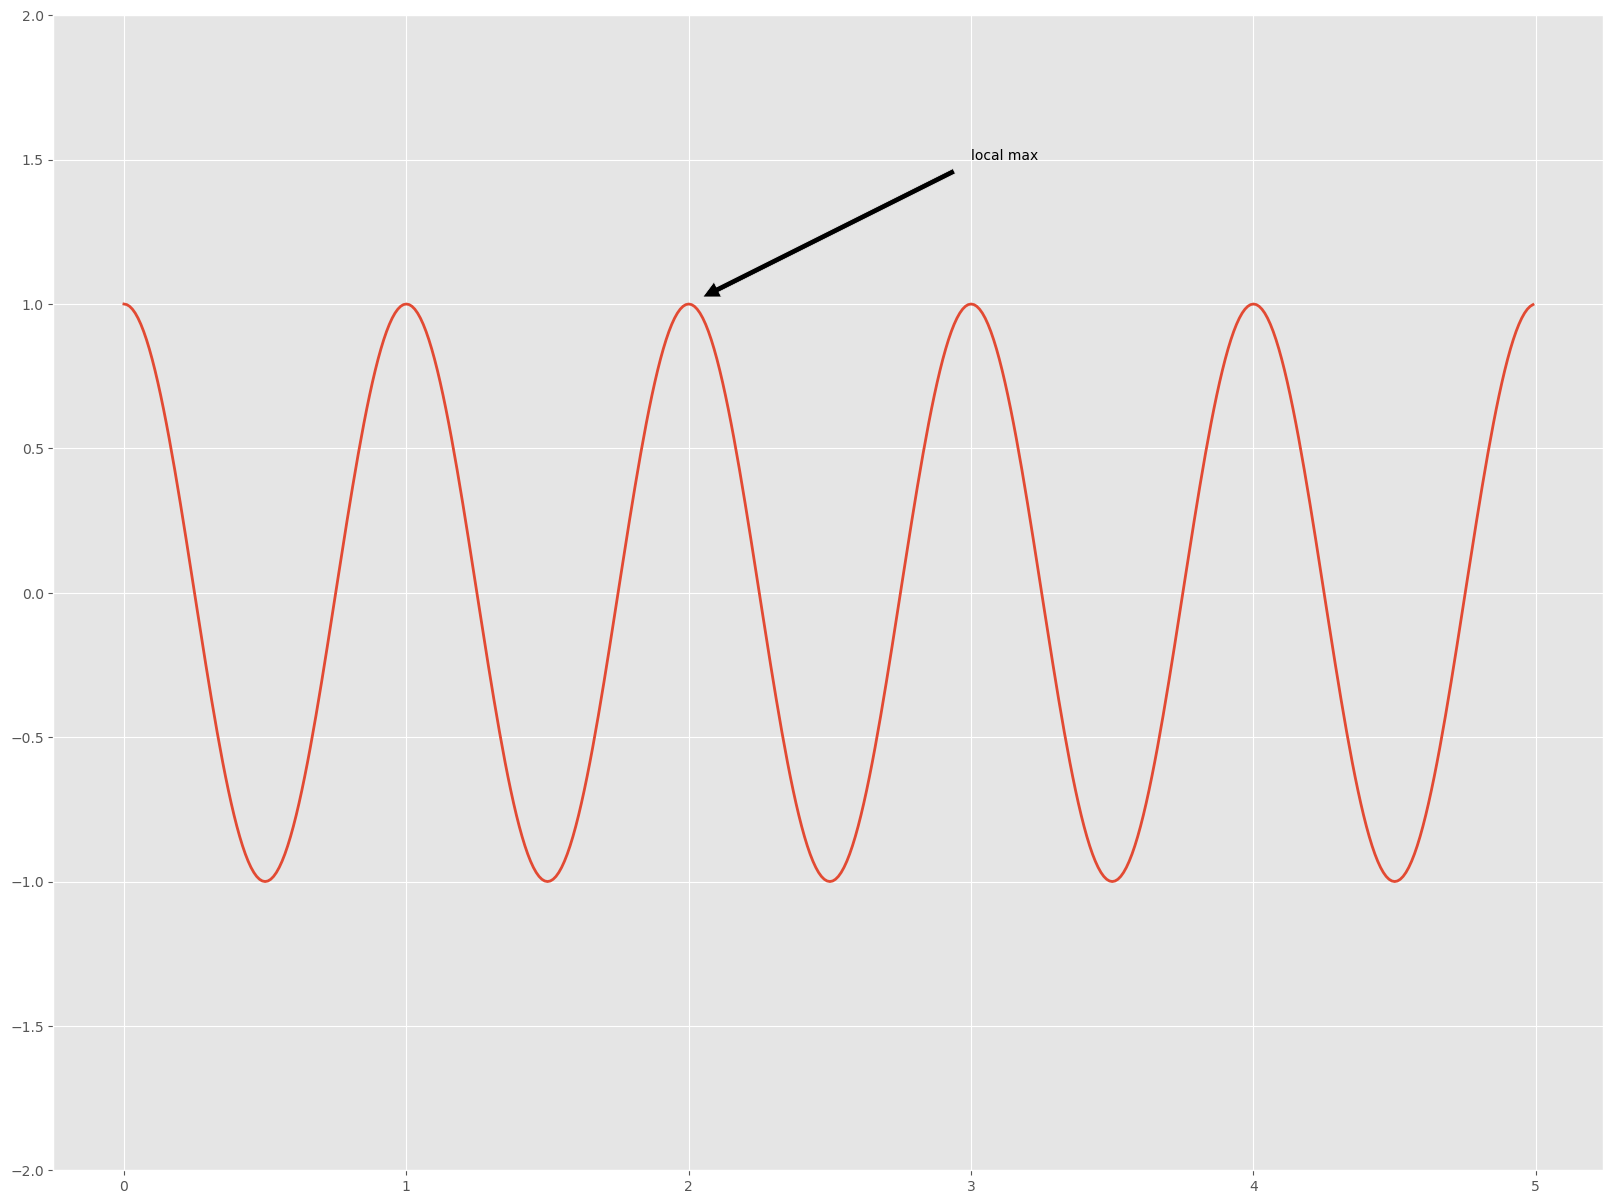

In [38]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.set_ylim(-2,2)
plt.show()

In this example, both the xy (arrow tip) and xytext locations (text location) are in data coordinates. There are a variety of other coordinate systems one can choose – you can specify the coordinate system of xy and xytext with one of the following strings for xycoords and textcoords (default is ‘data’)

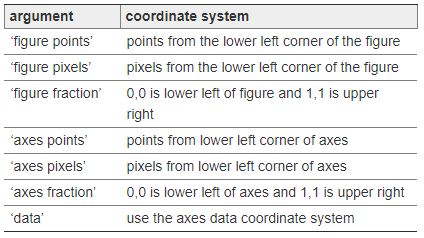

For example to place the text coordinates in fractional axes coordinates, one could do:

`ax.annotate('local max', xy=(3, 1),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )`
            
For physical coordinate systems (points or pixels) the origin is the bottom-left of the figure or axes.

Optionally, you can enable drawing of an arrow from the text to the annotated point by giving a dictionary of arrow properties in the optional keyword argument arrowprops.

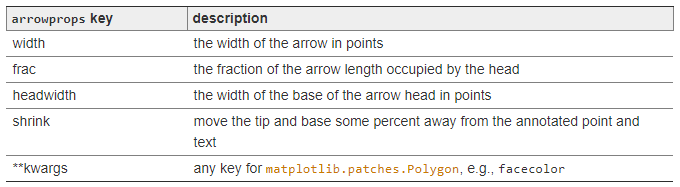

In the example below, the xy point is in native coordinates (xycoords defaults to ‘data’). For a polar axes, this is in (theta, radius) space. The text in this example is placed in the fractional figure coordinate system. matplotlib.text.Text keyword args like horizontalalignment, verticalalignment and fontsize are passed from annotate to the Text instance.

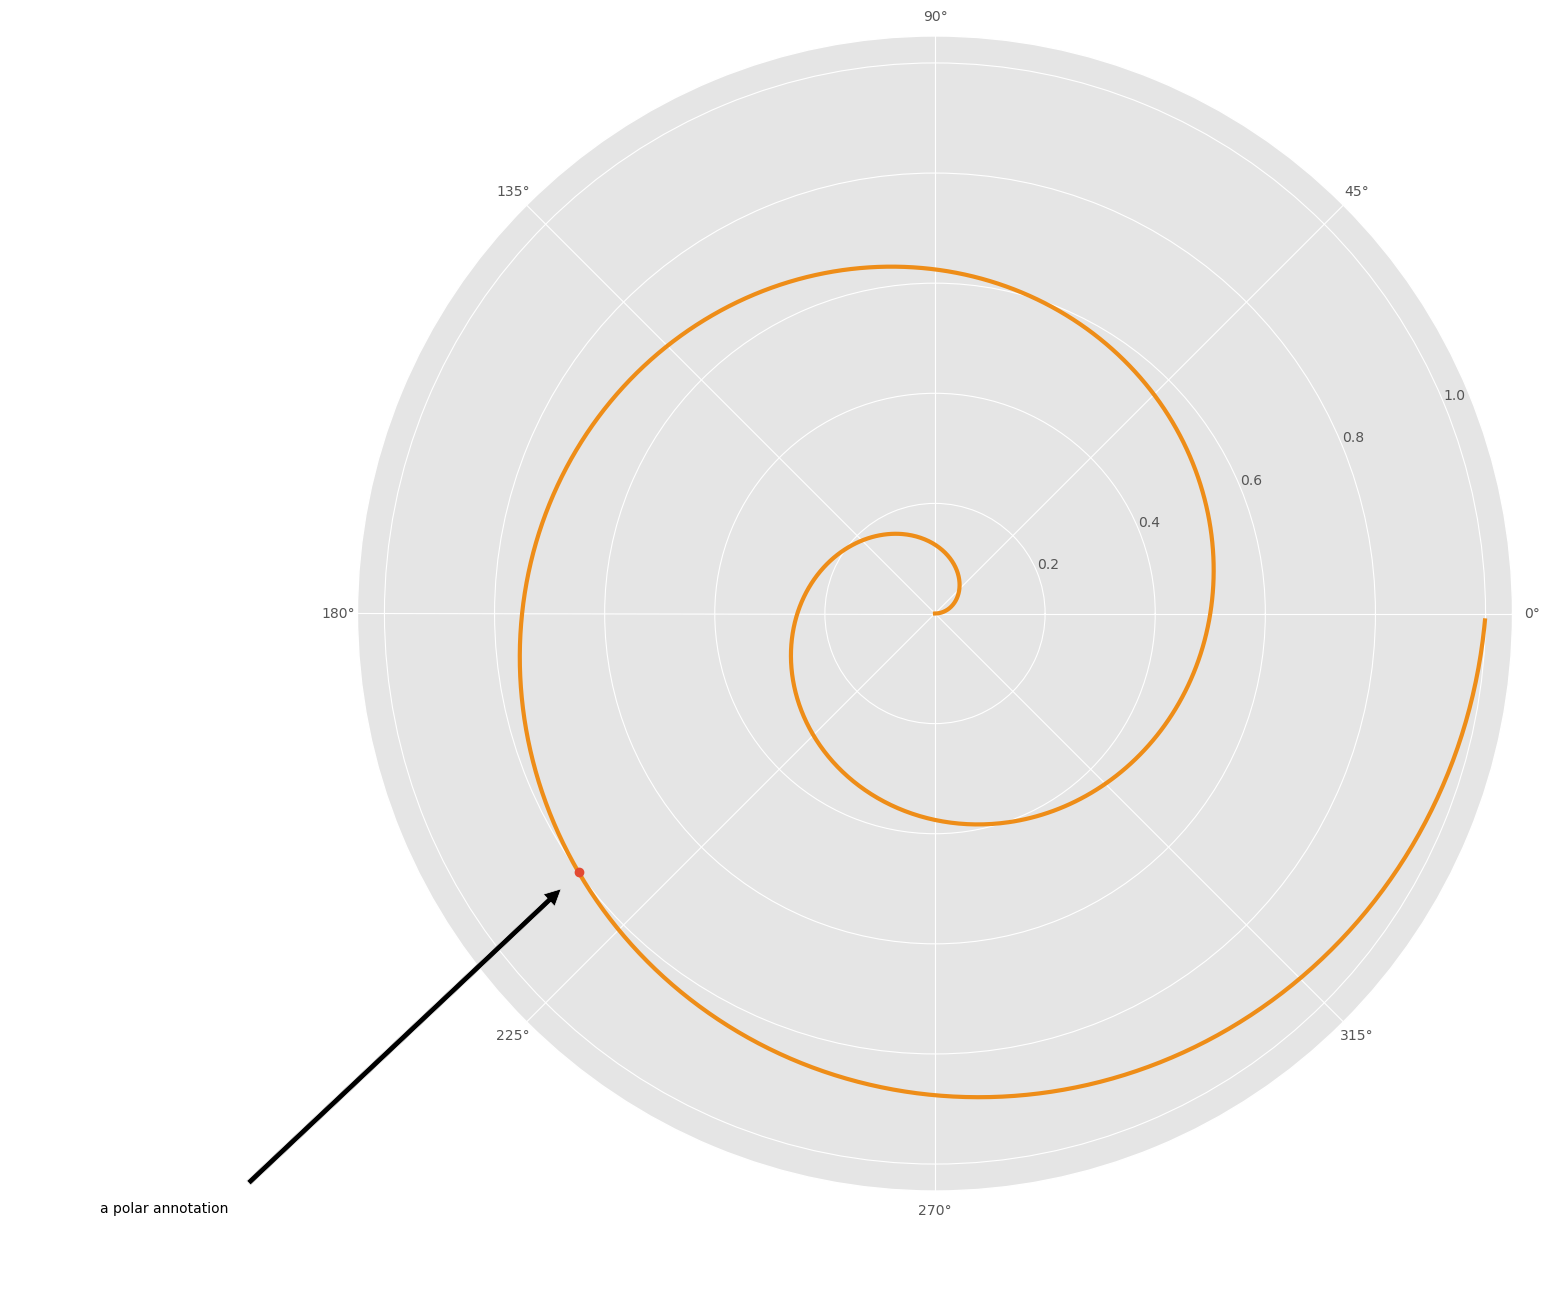

In [39]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

## Advanced Annotations

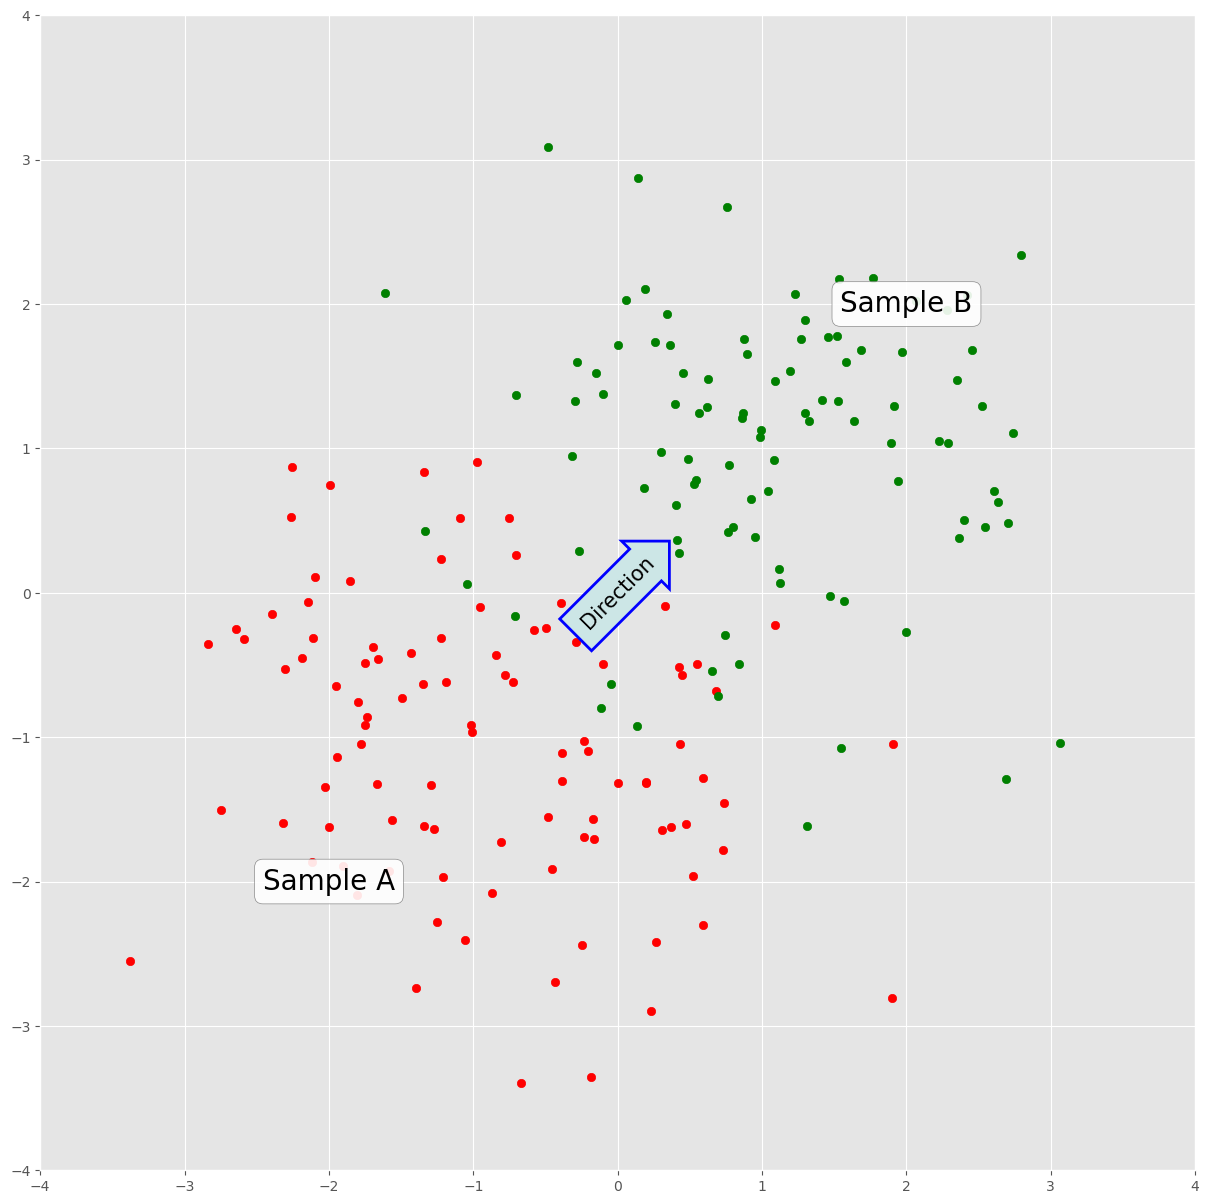

In [40]:
import numpy.random
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(15,15))
fig.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

x1 = -1 + numpy.random.randn(100)
y1 = -1 + numpy.random.randn(100)
x2 = 1. + numpy.random.randn(100)
y2 = 1. + numpy.random.randn(100)

ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(2, 2, "Sample B", ha="center", va="center", size=20,
        bbox=bbox_props)


bbox_props = dict(boxstyle="rarrow", fc=(0.8,0.9,0.9), ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

plt.draw()
plt.show()


Few of the example annotations are shown below

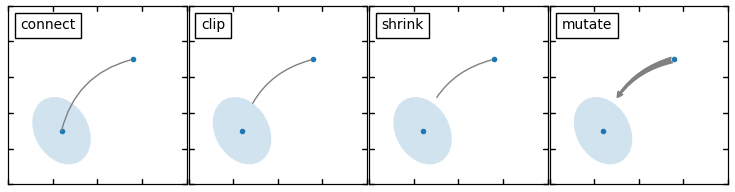

# 8. Different types of Plots in Matplotlib

## Histograms

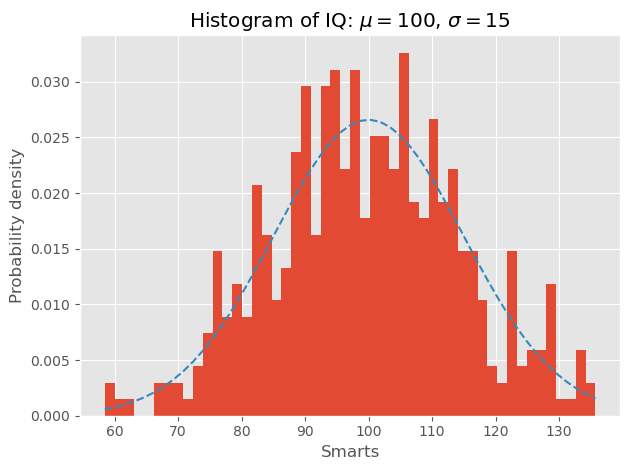

In [44]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(0)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


## Paths

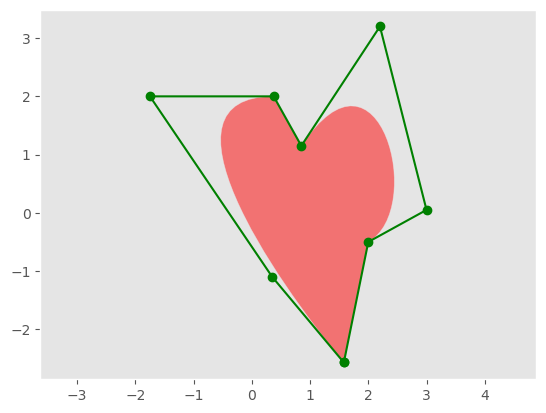

In [45]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()


## Bar charts
Bar charts are simple to create using the bar() command, which includes customizations such as error bars:

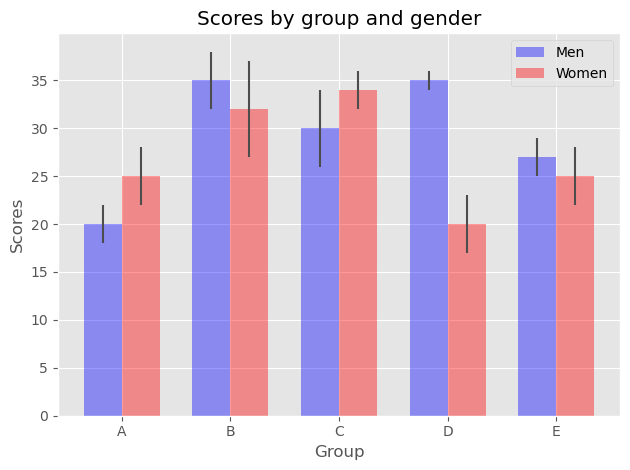

In [46]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
plt.legend()

plt.tight_layout()
plt.show()


## Advanced Bar Charts

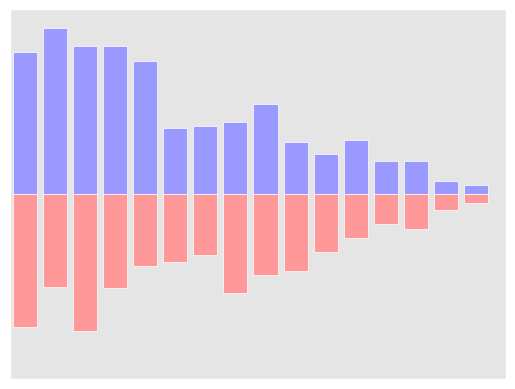

In [47]:
import numpy as np
import matplotlib.pyplot as plt

n = 16
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
plt.bar(X, Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')
plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1, 1)
plt.yticks(())


# Add a title and a box around it
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()

plt.show()

## Pie charts
The pie() command allows you to easily create pie charts. Optional features include auto-labeling the percentage of area, exploding one or more wedges from the center of the pie, and a shadow effect. Take a close look at the attached code, which generates this figure in just a few lines of code.

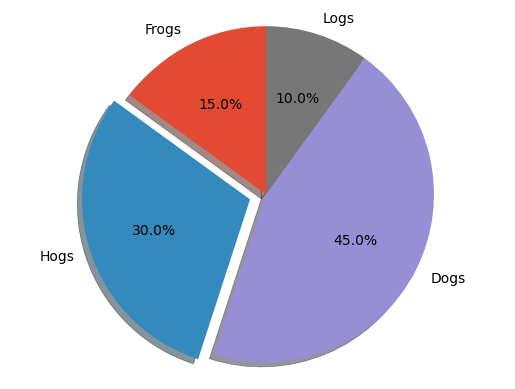

In [48]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## Table demo
The table() command adds a text table to an axes.

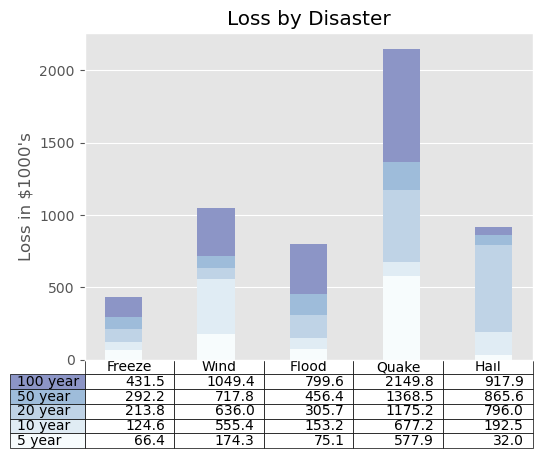

In [49]:
import numpy as np
import matplotlib.pyplot as plt


data = [[  66386,  174296,   75131,  577908,   32015],
        [  58230,  381139,   78045,   99308,  160454],
        [  89135,   80552,  152558,  497981,  603535],
        [  78415,   81858,  150656,  193263,   69638],
        [ 139361,  331509,  343164,  781380,   52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.array([0.0] * len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x/1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()


## Scatter
The scatter() command makes a scatter plot with (optional) size and color arguments. This example plots changes in Google’s stock price, with marker sizes reflecting the trading volume and colors varying with time. Here, the alpha attribute is used to make semitransparent circle markers.

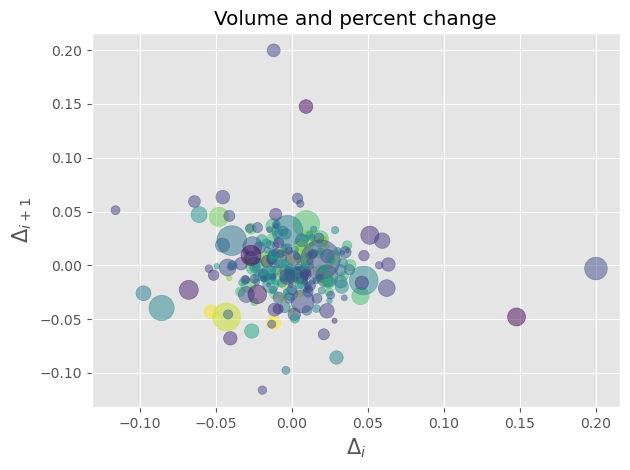

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date,
# open, close, volume, adj_close from the mpl-data/example directory.
# The record array stores python datetime.date as an object array in
# the date column
datafile = 'goog.npy'
try:
    # Python3 cannot load python2 .npy files with datetime(object) arrays
    # unless the encoding is set to bytes. However this option was
    # not added until numpy 1.10 so this example will only work with
    # python 2 or with numpy 1.10 and later
    price_data = np.load(datafile, encoding='bytes', allow_pickle=True).view(np.recarray)
except TypeError:
    price_data = np.load(datafile).view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close)/price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()


## Fill demo
The fill() command lets you plot filled curves and polygons:

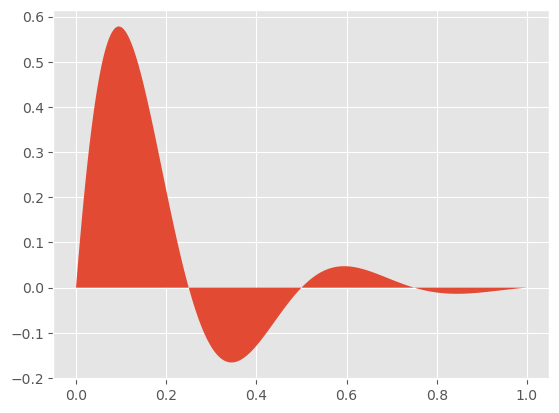

In [52]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()


## Date
You can plot date data with major and minor ticks and custom tick formatters for both.

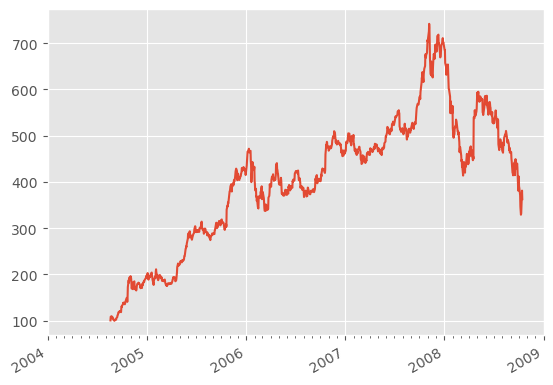

In [54]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# load a numpy record array from yahoo csv data with fields date,
# open, close, volume, adj_close from the mpl-data/example directory.
# The record array stores python datetime.date as an object array in
# the date column
datafile = 'goog.npy'
try:
    # Python3 cannot load python2 .npy files with datetime(object) arrays
    # unless the encoding is set to bytes. However this option was
    # not added until numpy 1.10 so this example will only work with
    # python 2 or with numpy 1.10 and later.
    r = np.load(datafile, encoding='bytes', allow_pickle=True).view(np.recarray)
except TypeError:
    r = np.load(datafile).view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(r.date.min().year, 1, 1)
datemax = datetime.date(r.date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()


## Log plots
The semilogx(), semilogy() and loglog() functions simplify the creation of logarithmic plots.

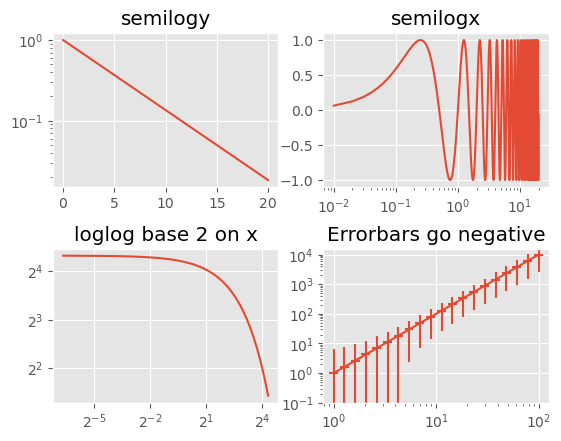

In [57]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplots_adjust(hspace=0.4)
t = np.arange(0.01, 20.0, 0.01)

# log y axis
plt.subplot(221)
plt.semilogy(t, np.exp(-t/5.0))
plt.title('semilogy')
plt.grid(True)

# log x axis
plt.subplot(222)
plt.semilogx(t, np.sin(2*np.pi*t))
plt.title('semilogx')
plt.grid(True)

# log x and y axis
plt.subplot(223)
plt.loglog(t, 20*np.exp(-t/10.0), base=2)
plt.grid(True)
plt.title('loglog base 2 on x')

# with errorbars: clip non-positive values
ax = plt.subplot(224)
ax.set_xscale("log")
ax.set_yscale("log")

x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0
plt.errorbar(x, y, xerr=0.1*x, yerr=5.0 + 0.75*y)
ax.set_ylim(ymin=0.1)
ax.set_title('Errorbars go negative')


plt.show()


## Polar plots
The polar() command generates polar plots.

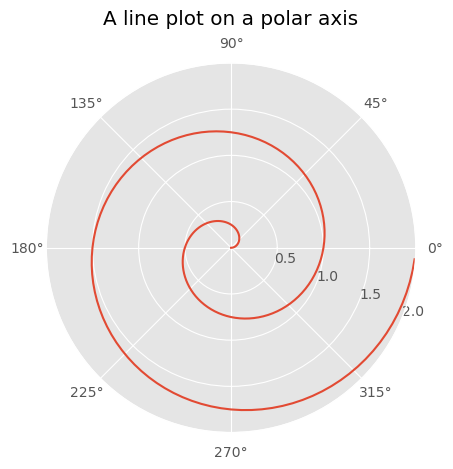

In [58]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()


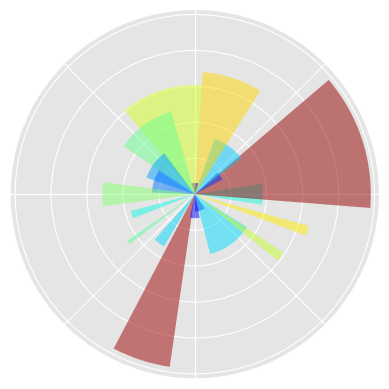

In [59]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(1, 1, 1, polar=True)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

plt.show()

## Streamplot
The streamplot() function plots the streamlines of a vector field. In addition to simply plotting the streamlines, it allows you to map the colors and/or line widths of streamlines to a separate parameter, such as the speed or local intensity of the vector field.

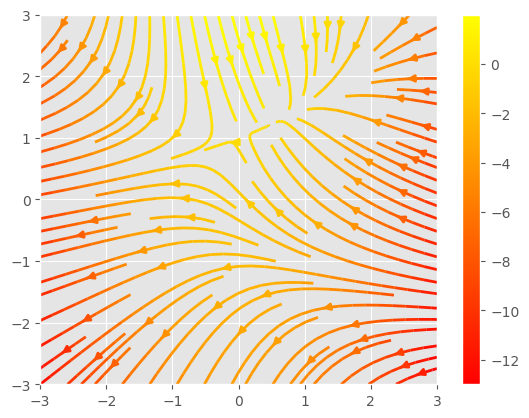

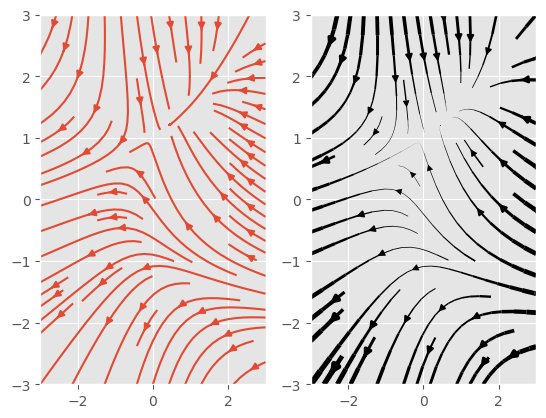

In [60]:
import numpy as np
import matplotlib.pyplot as plt

Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
fig0.colorbar(strm.lines)

fig1, (ax1, ax2) = plt.subplots(ncols=2)
ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

plt.show()


## Ellipses
In support of the Phoenix mission to Mars (which used matplotlib to display ground tracking of spacecraft), Michael Droettboom built on work by Charlie Moad to provide an extremely accurate 8-spline approximation to elliptical arcs (see Arc), which are insensitive to zoom level.

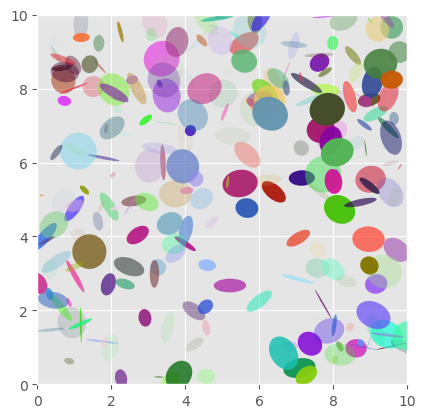

In [61]:
import matplotlib.pyplot as plt
import numpy.random as rnd
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=rnd.rand(2)*10, width=rnd.rand(), height=rnd.rand(), angle=rnd.rand()*360)
        for i in range(NUM)]

fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(rnd.rand())
    e.set_facecolor(rnd.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()


## mplot3d
The mplot3d toolkit (see mplot3d tutorial and mplot3d Examples) has support for simple 3d graphs including surface, wireframe, scatter, and bar charts.

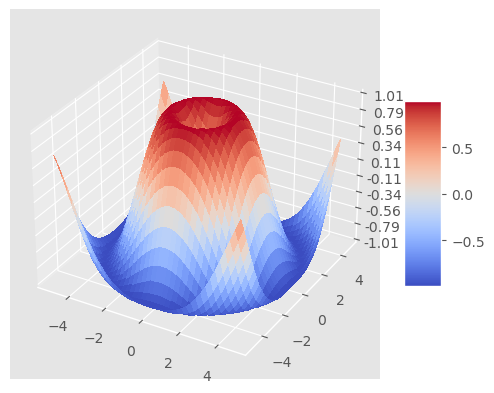

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection = '3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


## XKCD-style sketch plots
matplotlib supports plotting in the style of xkcd.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

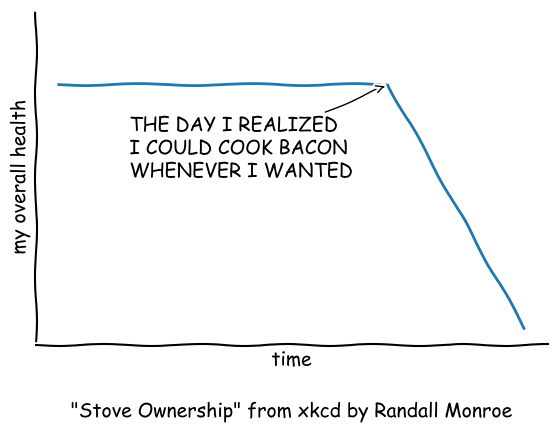

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

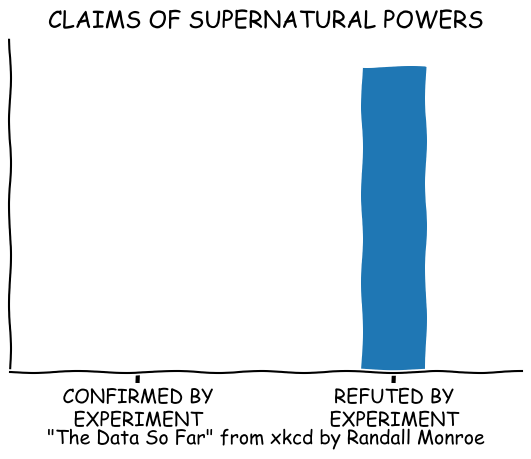

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.05,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')

plt.show()


# 9. 3D Plots

Three dimensional graphing in Matplotlib is already built in, so we do not need to download anything more. First, we need to bring in some integral modules:

## 3D Scatter Plots

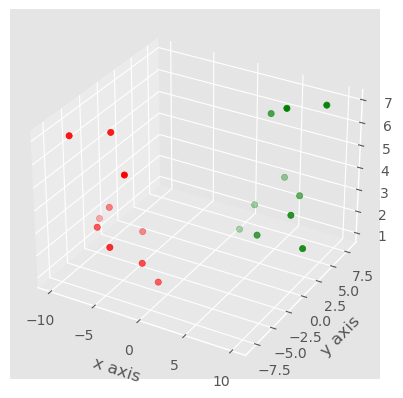

In [4]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x = [1,2,3,4,5,6,7,8,9,10]
y = [5,6,7,8,2,5,6,3,7,2]
z = [1,2,6,3,2,7,3,3,7,2]

x2 = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]
y2 = [-5,-6,-7,-8,-2,-5,-6,-3,-7,-2]
z2 = [1,2,6,3,2,7,3,3,7,2]

ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

## 3D Bar Chart with Matplotlib

The 3D bar chart is quite unique, as it allows us to plot more than 3 dimensions. No, you cannot plot past the 3rd dimension, but you can plot more than 3 dimensions.

With bars, you have the starting point of the bar, the height of the bar, and the width of the bar. With a 3D bar, you also get another choice, which is depth of the bar. Most of the time, a bar chart starts with the bar flat on an axis, but you can add another dimension by releasing this constraint as well. We'll keep it rather simple, however:

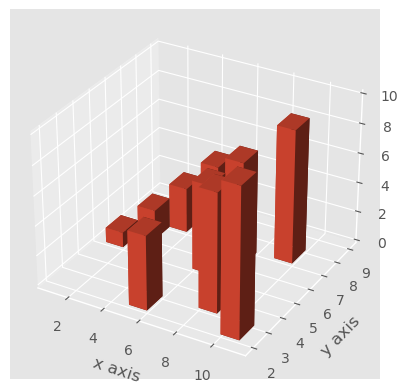

In [5]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,6,7,8,9,10]
y3 = [5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(x3, y3, z3, dx, dy, dz)


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

## 10.Image Tutorials

Importing image data into Numpy arrays
Loading image data is supported by the Pillow library. Natively, matplotlib only supports PNG images. The commands shown below fall back on Pillow if the native read fails.

The image used in this example is a JPG file, so it fall back to Pillow
Here’s the image we’re going to play with:

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread('Lion.jpg')

In [7]:
img

array([[[185, 136,  78],
        [185, 136,  78],
        [185, 136,  78],
        ...,
        [224, 146,  84],
        [224, 146,  84],
        [224, 146,  84]],

       [[185, 136,  78],
        [185, 136,  78],
        [185, 136,  78],
        ...,
        [224, 146,  84],
        [224, 146,  84],
        [224, 146,  84]],

       [[185, 136,  78],
        [185, 136,  78],
        [185, 136,  78],
        ...,
        [224, 146,  84],
        [224, 146,  84],
        [224, 146,  84]],

       ...,

       [[155, 117,  68],
        [156, 118,  69],
        [157, 119,  70],
        ...,
        [161, 121,  60],
        [160, 120,  59],
        [160, 120,  58]],

       [[155, 117,  68],
        [156, 118,  69],
        [157, 119,  70],
        ...,
        [161, 121,  60],
        [160, 120,  58],
        [160, 120,  58]],

       [[155, 117,  70],
        [156, 118,  71],
        [157, 119,  70],
        ...,
        [161, 121,  60],
        [159, 119,  57],
        [160, 121,  56]]

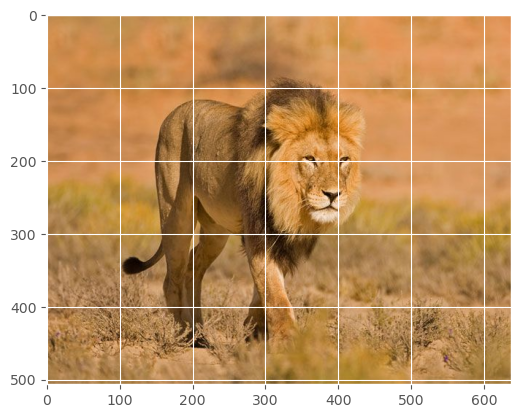

In [8]:
imgplot = plt.imshow(img)

## Applying pseudocolor schemes to image plots
Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity images. We currently have an RGB image. Since R, G, and B are all similar (see for yourself above or in your data), we can just pick one channel of our data:

In [9]:
lum_img = img[:,:,0]

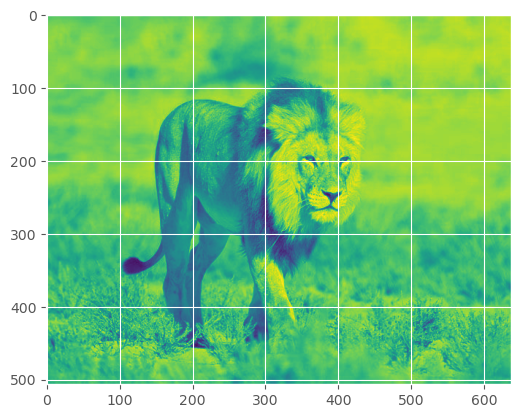

In [10]:
plt.imshow(lum_img)

Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table, LUT), is applied. The default is called viridis. There are plenty of others to choose from.

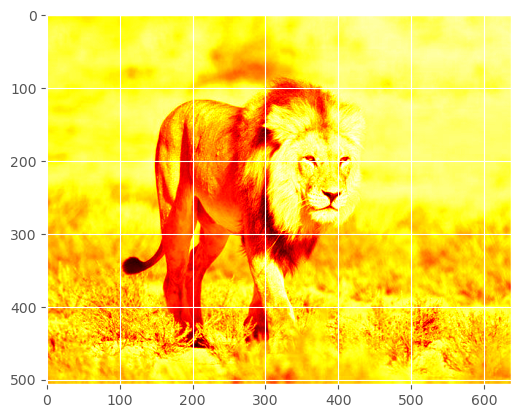

In [11]:
plt.imshow(lum_img, cmap="hot")

Note that you can also change colormaps on existing plot objects using the set_cmap() method:

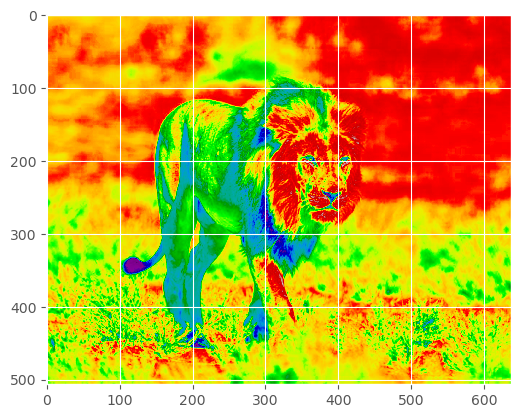

In [12]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

## Color scale reference
It’s helpful to have an idea of what value a color represents. We can do that by adding color bars.

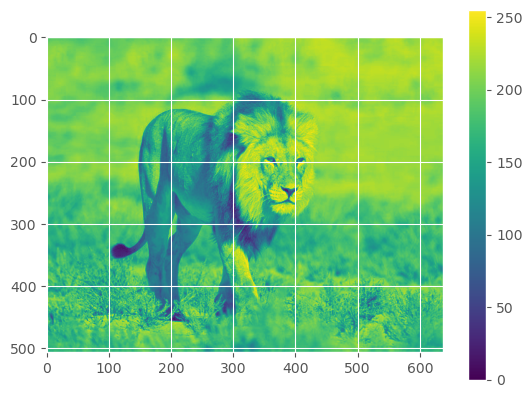

In [13]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

## Examining a specific data range
Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the hist() function.

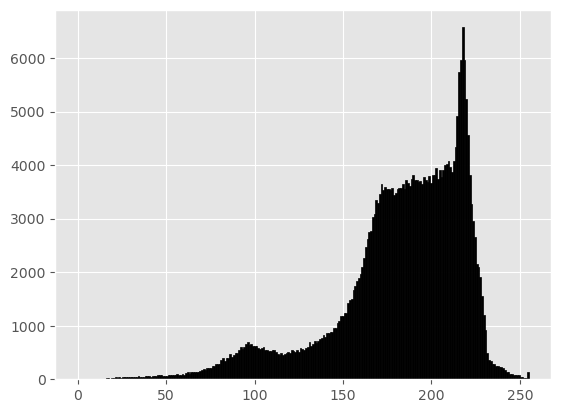

In [14]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')
plt.show()

# 11.Animation

For quite a long time, animation in matplotlib was not an easy task and was done mainly through clever hacks. However, things have started to change since version 1.1 and the introduction of tools for creating animation very intuitively, with the possibility to save them in all kind of formats (but don't expect to be able to run very complex animation at 60 fps though).

The most easy way to make an animation in matplotlib is to declare a FuncAnimation object that specifies to matplotlib what is the figure to update, what is the update function and what is the delay between frames.

## Drip drop

A very simple rain effect can be obtained by having small growing rings randomly positioned over a figure. Of course, they won't grow forever since the wave is supposed to damp with time. To simulate that, we can use a more and more transparent color as the ring is growing, up to the point where it is no more visible. At this point, we remove the ring and create a new one.

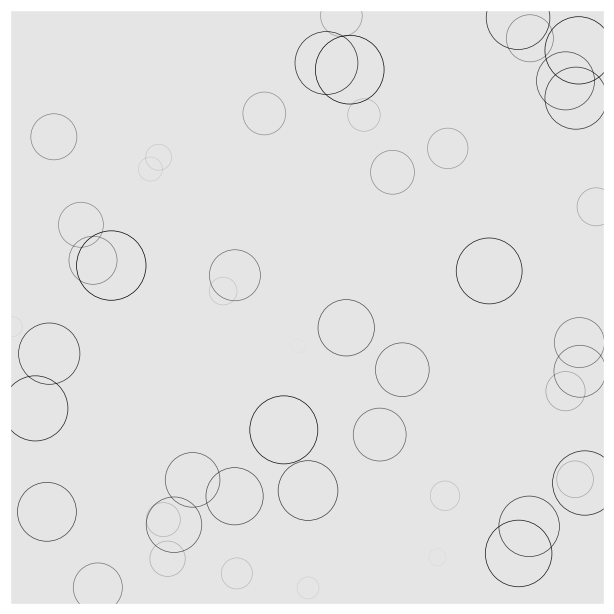

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
ax = fig.add_axes([0.005,0.005,.99,.99], frameon=True, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

# plt.savefig("../figures/rain-static.png",dpi=72)
plt.show()

## Rain Drop with Animation


KeyboardInterrupt



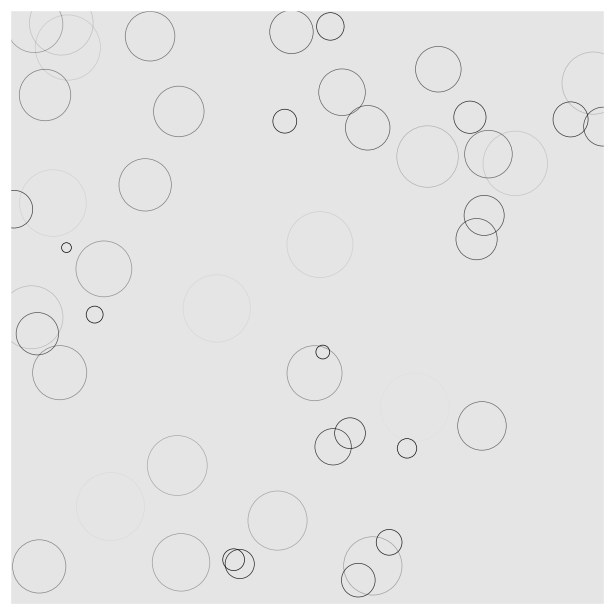

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML
# No toolbar
matplotlib.rcParams['toolbar'] = 'None'

# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
# ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax = fig.add_axes([0.005,0.005,0.990,0.990], frameon=True, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])


def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)
    return scat,

animation = FuncAnimation(fig, update, interval=10)
HTML(animation.to_html5_video())



### Basemap
In this Matplotlib tutorial, we're going to be covering the geographic plotting module, Basemap. Basemap is an extension to Matplotlib.

In order to use Basemap, we first need it. To get Basemap, you can either get it from here: http://matplotlib.org/basemap/users/download.html, or you can go to http://www.lfd.uci.edu/~gohlke/pythonlibs/.

If you are having trouble installing Basemap, check out the pip installation tutorial.

Once you have Basemap installed, you're ready to create maps. First, let's just project a simple map. To do this, we need to import Basemap, pyplot, create the projection, draw at least some sort of outline or data, then we can show the graph.

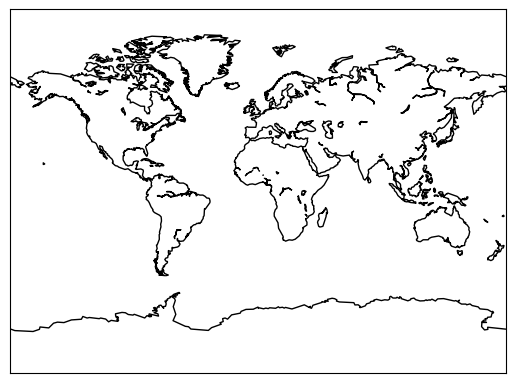

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill')
m.drawcoastlines()
plt.show()

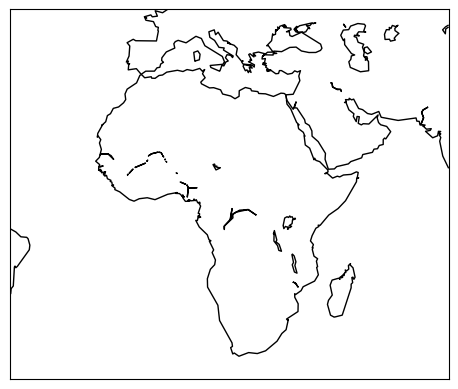

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',
            llcrnrlat = -40,
            llcrnrlon = -40,
            urcrnrlat = 50,
            urcrnrlon = 75)
m.drawcoastlines()
plt.show()

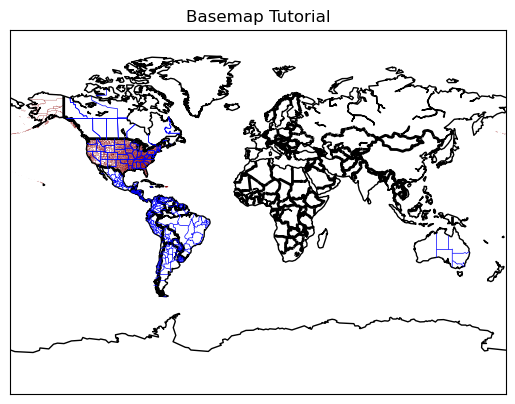

In [3]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',
            llcrnrlat = -90,
            llcrnrlon = -180,
            urcrnrlat = 90,
            urcrnrlon = 180)

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')
m.drawcounties(color='darkred')

plt.title('Basemap Tutorial')
plt.show()

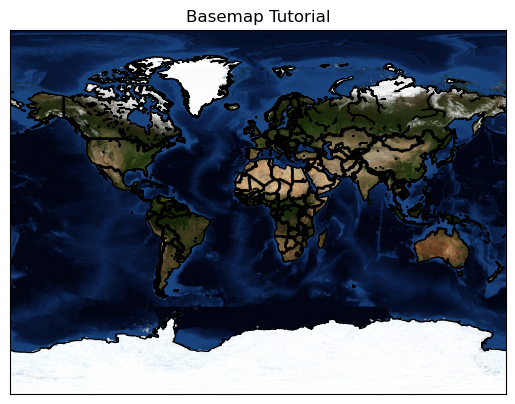

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',
            llcrnrlat = -90,
            llcrnrlon = -180,
            urcrnrlat = 90,
            urcrnrlon = 180,
            resolution='l')

m.drawcoastlines()
m.drawcountries(linewidth=2)
##m.drawstates(color='b')
##m.drawcounties(color='darkred')
#m.fillcontinents()
#m.etopo()
m.bluemarble()

plt.title('Basemap Tutorial')
plt.show()

 In this tutorial, we're going to cover how to plot single coordinates, as well as how to connect those coordinates in your geographic plot.

First, we're going to start with some basic starting data:

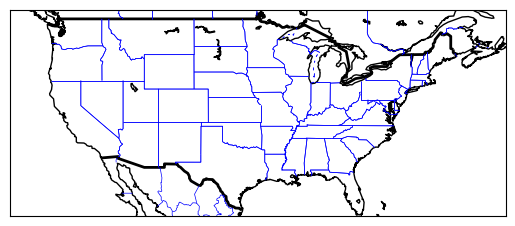

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -130,
            urcrnrlat = 50,
            urcrnrlon = -60,
            resolution='l')

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')

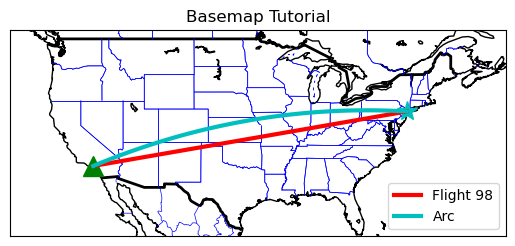

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -130,
            urcrnrlat = 50,
            urcrnrlon = -60,
            resolution='l')

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')
#m.drawcounties(color='darkred')
#m.fillcontinents()
#m.etopo()
#m.bluemarble()

xs = []
ys = []

NYClat, NYClon = 40.7127, -74.0059
xpt, ypt = m(NYClon, NYClat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'c*', markersize=15)

LAlat, LAlon = 34.05, -118.25
xpt, ypt = m(LAlon, LAlat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'g^', markersize=15)

m.plot(xs, ys, color='r', linewidth=3, label='Flight 98')
m.drawgreatcircle(NYClon, NYClat, LAlon, LAlat, color='c', linewidth=3, label='Arc')


plt.legend(loc=4)
plt.title('Basemap Tutorial')
plt.show()


## Earthquakes

We'll now use the rain animation to visualize earthquakes on the planet from the last 30 days. The USGS Earthquake Hazards Program is part of the National Earthquake Hazards Reduction Program (NEHRP) and provides several data on their website. Those data are sorted according to earthquakes magnitude, ranging from significant only down to all earthquakes, major or minor. You would be surprised by the number of minor earthquakes happening every hour on the planet. Since this would represent too much data for us, we'll stick to earthquakes with magnitude > 4.5. At the time of writing, this already represent more than 300 earthquakes in the last 30 days.

First step is to read and convert data. We'll use the urllib library that allows to open and read remote data. Data on the website use the CSV format whose content is given by the first line:

`time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
2015-08-17T13:49:17.320Z,37.8365,-122.2321667,4.82,4.01,mw,...
2015-08-15T07:47:06.640Z,-10.9045,163.8766,6.35,6.6,mwp,...`

We are only interested in latitude, longitude and magnitude and we won't parse time of event (ok, that's bad, feel free to send me a PR). we need to draw earth on a figure to show precisely where the earthquake center is and to translate latitude/longitude in some coordinates matplotlib can handle. Fortunately, there is the basemap project (that tends to be replaced by the more complete cartopy) that is really simple to install and to use. First step is to define a projection to draw the earth onto a screen (there exists many different projections) and we'll stick to the mill projection which is rather standard for non-specialist like me.

Next, we request to draw coastline and fill continents:

The earth object will also be used to translate coordinate quite automatically. We are almost finished. Last step is to adapt the rain code and put some eye candy:

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_20272\724756764.py:33: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  E = np.zeros(len(data), dtype=[('position',  float, 2),
C:\Users\Sumanth\AppData\Local\Temp\ipykernel_20272\724756764.py:43: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  P = np.zeros(50, dtype=[('position', float, 2),
C:\Users\Sumanth\AppData\Local\Temp\ipykernel_20272\724756764.py:78: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  animation = FuncAnimation(fig, update, interval=10)

KeyboardI

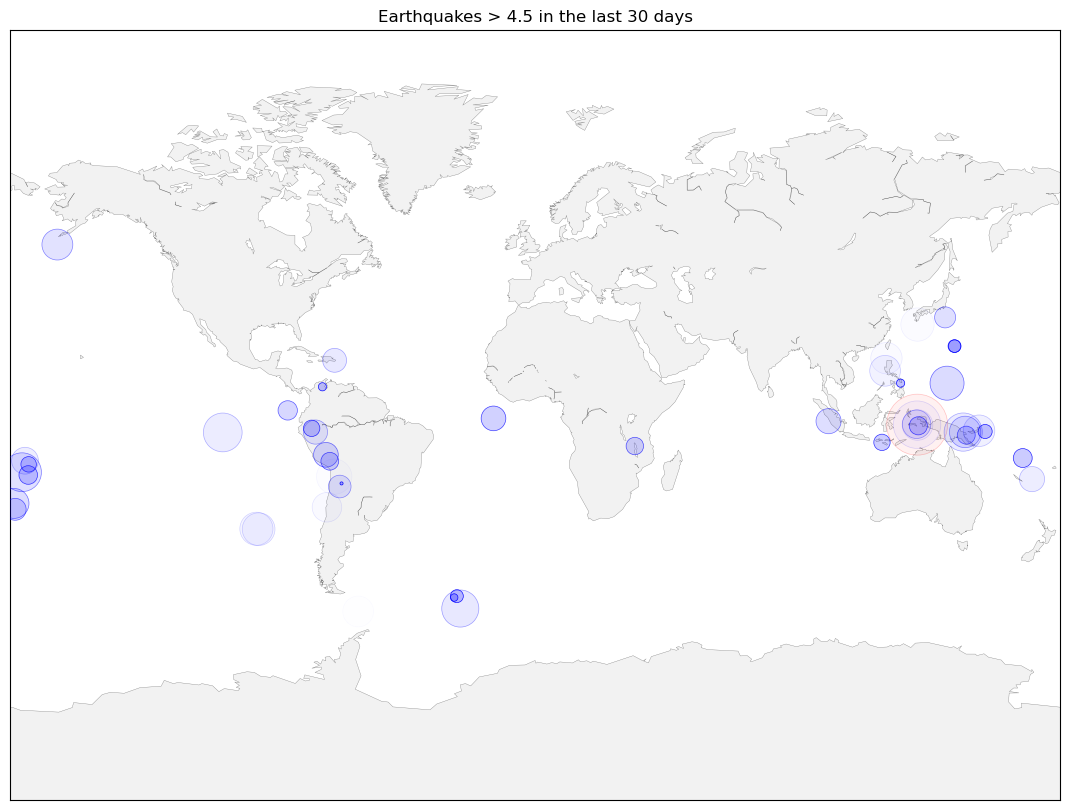

In [7]:
%matplotlib inline
import urllib
import numpy as np
import matplotlib
matplotlib.rcParams['toolbar'] = 'None'
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from  matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML


# Open the earthquake data
# -------------------------
# -> http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
feed = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/"

# Significant earthquakes in the past 30 days
# url = urllib.urlopen(feed + "significant_month.csv")

# Earthquakes of magnitude > 4.5 in the past 30 days
url = urllib.request.urlopen(feed + "4.5_month.csv")

# Earthquakes of magnitude > 2.5 in the past 30 days
# url = urllib.urlopen(feed + "2.5_month.csv")

# Earthquakes of magnitude > 1.0 in the past 30 days
# url = urllib.urlopen(feed + "1.0_month.csv")

# Set earthquake data
data = url.read()
data = data.split(b'\n')[+1:-1]
E = np.zeros(len(data), dtype=[('position',  float, 2),
                               ('magnitude', float, 1)])
for i in range(len(data)):
    row = data[i].split(b',')
    E['position'][i] = float(row[2]),float(row[1])
    E['magnitude'][i] = float(row[4])


fig = plt.figure(figsize=(14,10))
ax = plt.subplot(1,1,1)
P = np.zeros(50, dtype=[('position', float, 2),
                        ('size',     float, 1),
                        ('growth',   float, 1),
                        ('color',    float, 4)])

# Basemap projection
map = Basemap(projection='mill')
map.drawcoastlines(color='0.50', linewidth=0.25)
map.fillcontinents(color='0.95')
scat = ax.scatter(P['position'][:,0], P['position'][:,1], P['size'], lw=0.5,
                  edgecolors = P['color'], facecolors='None', zorder=10)


def update(frame):
    current = frame % len(E)
    i = frame % len(P)

    P['color'][:,3] = np.maximum(0, P['color'][:,3] - 1.0/len(P))
    P['size'] += P['growth']

    magnitude = E['magnitude'][current]
    P['position'][i] = map(*E['position'][current])
    P['size'][i] = 5
    P['growth'][i]= np.exp(magnitude) * 0.1

    if magnitude < 6:
        P['color'][i]    = 0,0,1,1
    else:
        P['color'][i]    = 1,0,0,1
    scat.set_edgecolors(P['color'])
    scat.set_facecolors(P['color']*(1,1,1,0.25))
    scat.set_sizes(P['size'])
    scat.set_offsets(P['position'])

plt.title("Earthquakes > 4.5 in the last 30 days")
animation = FuncAnimation(fig, update, interval=10)
HTML(animation.to_html5_video())

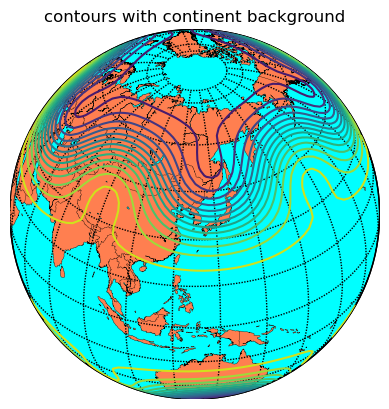

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 38N, 127E.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=38,lon_0=127,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 15 degrees.
map.drawmeridians(np.arange(0,360,15))
map.drawparallels(np.arange(-90,90,15))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contours with continent background')
plt.show()